Hello everyone,

Welcome to the Machine Learning (ML) course for the Fall 2023 semester! We want to extend a warm and enthusiastic greeting to each and every one of you.

In the coming months, we will investigate a wide range of topics, including different supervised and unsupervised learning methods, and use them on real-world data to explore the challenges people typically encounter in this field.

**A quick word on honor code:** Honor codes try to fostering academic honesty, trust, and commitment to uphold ethical standards. Here we provide a small honor code to discourage any kind of plagiarism, cheating and unauthorized collaboration.

1. **Implementation Questions**
    - You are <u> strictly prohibited </u> to read code snippets from your classmates.
    - You are <u> strictly prohibited </u> from *copying* code from any external source, except for Q&A websites like Stack Overflow. If you do use code from such sources, it is imperative to properly attribute and mention the source in your implementation.

2. **Non-implementation questions**
    - You should use your own words and not just copying the answers from ChatGPT or any other source on the web.
    - Please provide the source for any material you are using to answer the questions.
    - You are <u> strictly prohibited </u> to read and copy the answers of your classmates.

If we suspect that you have violated any of the above rules, you may lose the whole score of that exercise.

<font color='RED' size='+1'>**Important Note:**</font> Remember that <u>interpreting and analyzing</u> your code is just as important as the implementation itself. Therefore, it is crucial to not only write code but also to <u>document and provide detailed analysis</u> of the results and insights derived from the code. This analysis should explain the significance of the findings, highlight any patterns or trends observed, and offer interpretations that contribute to a deeper understanding of the data or problem at hand. Additionally, ensure that your code is <u>well-commented</u> to enhance its readability and facilitate comprehension.


As your teaching assistants, we are here to support your learning journey throughout the Fall 2023 semester. If you have any questions about the course material, need guidance on assignments, or seek additional resources, please don't hesitate to reach out to us.

Best regards, </br>
Sina Abbasi, Armin Tourajmehr

# End-to-End Machine Learning Project

For your first exercise, we will go through different steps of an ML task and try to solve a problem on a real-world dataset.
This exercise covers the $2^{nd}$ chapter of the *Hands-On Machine Learning* book, which is your main resource for this course. You can refer to the book for more details about each of these steps.

## Look at the Big Picture



### Frame the Problem

We use ML to solve a problem. This could be detecting whether an email is spam or not, or estimating the price of a house based on its features. As we can see, different problems have different goals, and the goal is not probably just building a model. In an ML task, this goal is called objective, and the objective is always an essential part of any ML task because it determines what we are looking for. Based on that, we can choose the most appropriate algorithm and performance measure to tackle the problem. Another valuable thing to know is the current solution, whether as a clue to solve the task at hand or as a reference for performance.

With all this information, you are now ready to start designing your system. First, determine what kind of training supervision the model will need: is it a supervised, unsupervised, semi-supervised, self-supervised, or reinforcement learning task?

<font color='#D61E85' size='+2'>**Q1:**</font> Explain each of these five kind of supervision in one paragraph. Provide an example for each one of them.


<font color='#8FCF26' size='+2'>**A1:**</font>

**1.Supervised Learning**

*In this approach, the data consists of a set of features and labels, and the model learns to predict those labels based on these features. To achieve this, it attempts to minimize a loss function, which includes the error between the model's predictions and the actual labels. This approach can be broadly divided into two categories: regression and classification. In regression, our label is a real value, for example, predicting the price of a house based on its features. In classification, our label is a discrete value, such as determining whether an image contains a dog or a cat.*



**2.Unsupervised Learning**

*In this approach, our data is unlabeled, and the model strives to discover specific patterns inherent in the data. For example, in a clustering problem, the model attempts to group the data based on their similarity into different clusters. A real-world problem that this approach can address is the classification of customers of an online retailer based on their purchase history.*



**3.Semi-Supervised**

*This approach is a combination of the two previous ones, in a way that some of the data have labels, and another portion (often a larger one) does not have labels. The model attempts to learn labels from the features of the unlabeled data while simultaneously making use of patterns that exist within the data. For example, it can leverage a language model trained on a large amount of unlabeled data to solve a text classification problem.*


**4.Self-Supervised**

*In this approach, the model creates labels without the need for human intervention, directly from the data, and then, similar to the first approach, operates on it as if it were a supervised learning problem. For example, it can be used for tasks like automatic sentence completion or filling in missing parts of an image.*


**5.Reinforcement Learning**

*In this approach, an intelligent agent interacts with an environment, striving to make the best decisions to maximize its cumulative reward. For example, self-driving cars, by navigating roads while considering penalties and rewards for their actions in various driving scenarios, aim to maximize their overall reward.*


### Select a Performance Measure

In ML, a performance measure, also known as an evaluation metric, is a measure used to assess the performance or effectiveness of a machine learning model. It quantifies how well the model is able to accomplish its intended task. The choice of performance measure depends on the specific problem and the desired objective.

## Package

In [76]:
from IPython.display import clear_output
!pip install sweetviz
!pip install autoviz
!pip install word2number
clear_output()

In [77]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import sweetviz as sv
from autoviz.AutoViz_Class import AutoViz_Class
from IPython.display import IFrame, HTML

from sklearn.preprocessing import LabelEncoder



## Data

It serves as the foundation for model training and the model looking for the patterns in the data provided in order to make predictions on unseen samples. The data we chose for this exercise is Medical Cost Personal Datasets, which you can learn more about it in the next section.




In [78]:
#download data
!gdown --id 10DwIG6NNt0GOYkZ2-S8HyZFCt0Ngoobz

/usr/local/lib/python3.10/dist-packages/gdown/cli.py:121: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From: https://drive.google.com/uc?id=10DwIG6NNt0GOYkZ2-S8HyZFCt0Ngoobz
To: /content/insurance.csv
100% 55.4k/55.4k [00:00<00:00, 82.2MB/s]


### About the Data

The meaning of each column in the dataset is as follows:

* **age:** age of primary beneficiary
* **sex:** insurance contractor gender, female, male
* **bmi:** Body mass index, providing an understanding of body, weights that are relatively high or low relative to height, objective index of body weight $(kg / m ^ 2)$ using the ratio of height to weight, ideally 18.5 to 24.9
* **children:** Number of children covered by health insurance / Number of dependents
* **smoker:** Smoking
* **region:** the beneficiary's residential area in the US, northeast, southeast, southwest, northwest.
* **charges:** Individual medical costs billed by health insurance

<font color='#D61E85' size='+2'>**Q2:**</font> The data provided for this exercise can be used for both classification and regression tasks. Explain the difference between classification and regression tasks in just one paragraph by making use of examples. Now, consider we are trying to estimate individual medical costs billed by health insurance using the data provided. What type of supervision can we use for it?

<font color='#8FCF26' size='+2'>**A2:**</font> *In supervised learning, if the label is a continuous value, the problem falls into the category of regression. For example, predicting the price of a house based on its features. However, if the label is a discrete value, the problem is a classification task. For instance, determining whether an email is spam or not. With these descriptions, the problem of estimating an individual's medical expenses is of the regression (Supervised learning) type.*

<font color='#D61E85' size='+2'>**Q3:**</font> Considering the fact that we want to estimate medical costs billed by health insurance for each person, we know it’s a regression task. The performance measures we can use are MAE, MSE, MAPE, and R2-score. Write down the equation and explain the intuition behind each of them.

<font color='#8FCF26' size='+2'>**A3:**</font>


1. **Mean Absolute Error (MAE)**
\begin{equation}
MAE = \frac{1}{n} \sum_{i=1}^{n} \left| \text{actual}_i - \text{predicted}_i \right|
\end{equation}

  The Mean Absolute Error (MAE) calculates the average absolute difference between the actual and predicted values. It represents the average magnitude of errors in the predictions. A lower MAE indicates that the model's predictions are, on average, closer to the actual values, making it a useful metric for assessing the accuracy of the model's predictions.



2. **Mean Squared Error (MSE)**
\begin{equation}
MSE = \frac{1}{n} \sum_{i=1}^{n} \left( \text{actual}_i - \text{predicted}_i \right)^2
\end{equation}

  The Mean Squared Error (MSE) calculates the average of the squared differences between the actual and predicted values. Squaring the errors gives more weight to larger errors, which can be helpful in penalizing outliers. However, MSE makes the metric less interpretable than MAE because it measures the average of squared errors.



3. **Mean Absolute Percentage Error (MAPE)**
\begin{equation}
MAPE = \frac{1}{n} \sum_{i=1}^{n} \left| \frac{\text{actual}_i - \text{predicted}_i}{\text{actual}_i} \right| \times 100\%
\end{equation}

  The Mean Absolute Percentage Error (MAPE) measures the average percentage difference between the actual and predicted values. It is particularly useful when you want to understand the relative error in terms of percentages. MAPE is more interpretable in cases where you need to express errors in relative terms, and it provides insight into the magnitude of errors relative to the actual values.

  

4. **R-squared (R2) Score**
\begin{equation}
R2 = 1 - \frac{MSE(\text{model})}{MSE(\text{mean})}
\end{equation}

  The R-squared (R2) score, also known as the coefficient of determination, measures the proportion of the variance in the dependent variable that can be explained by the independent variables in the model. An R2 score of 1 indicates a perfect model that explains all the variance, while a score of 0 means that the model performs no better than simply predicting the mean of the dependent variable. Negative values of R2 can occur if the model performs worse than a model that predicts the mean. It is a measure of how well the model fits the data and provides insights into its goodness of fit.



Finding the data is not all that matters. Before you can start to build your model and predict, you need to get insights about data, which could be done using simple methods such as `info()`, `head()`, `describe()`, and `value_counts()`. You can also visualize the data for more insights, which we get to that in the next part of our checklist.

<font color='#D61E85' size='+2'>**Q4:**</font> Try to perform these methods on our dataset and get some insight about it. Is there any other methods to use?

<font color='#8FCF26' size='+2'>**A4:**</font> Create some cell down below to write and run your code.

In [79]:

# Load the dataset
insurance_data = pd.read_csv("insurance.csv")

In [80]:
# Get a summary of the dataset
print(insurance_data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   object 
 1   sex       1334 non-null   object 
 2   bmi       1337 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1335 non-null   object 
 6   charges   1327 non-null   float64
dtypes: float64(2), int64(1), object(4)
memory usage: 73.3+ KB
None


In [81]:
numeric_value = ['age', 'bmi', 'charges']
categorical_value = ['sex', 'children', 'smoker', 'region']

In [82]:
# Display the first few rows of the dataset
print(insurance_data.head())

  age   sex      bmi   children smoker   region      charges  
0  19  female  27.900      0      yes   southwest  16884.92400
1  18    male  33.770      1       no   southeast   1725.55230
2  28    male  33.000      3       no   southeast   4449.46200
3  33    male  22.705      0       no   northwest  21984.47061
4  32    male  28.880      0       no   northwest   3866.85520


In [83]:
# Generate summary statistics for numerical columns
print(insurance_data.describe())

           bmi       children       charges  
count  1337.000000  1338.000000   1327.000000
mean     30.845808     1.127803  13251.386466
std       8.745771     1.701587  12115.053915
min       0.000000    -1.000000   1121.873900
25%      26.220000     0.000000   4729.002375
50%      30.400000     1.000000   9304.701900
75%      34.700000     2.000000  16582.138605
max     231.600000    45.000000  63770.428010


In [84]:
# Count the unique values in the categorical column
for value in categorical_value:
  print(insurance_data[value].value_counts())
  print('\n\n')

male      675
female    658
femle       1
Name: sex, dtype: int64



 0     572
 1     324
 2     240
 3     157
 4      25
 5      18
 45      1
-1       1
Name: children, dtype: int64



no          1056
yes          272
0              5
not sure       1
YES            1
n              1
ye             1
No             1
Name: smoker, dtype: int64



southeast    362
northwest    325
southwest    324
northeast    312
NE             6
ne             2
northest       1
north          1
eastnorth      1
norteast       1
Name: region, dtype: int64





                                             |          | [  0%]   00:00 -> (? left)

Report sweetviz_report.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.



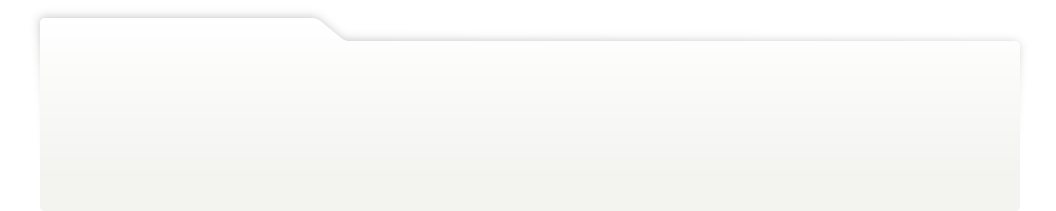
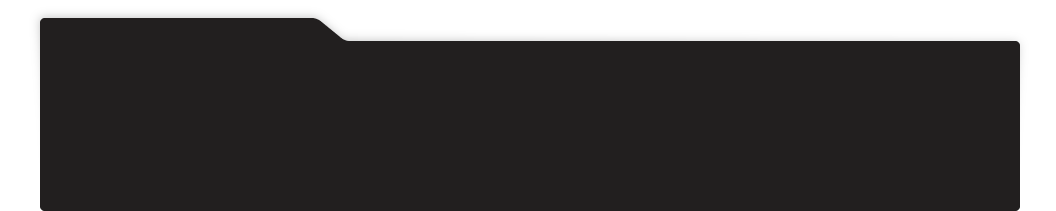
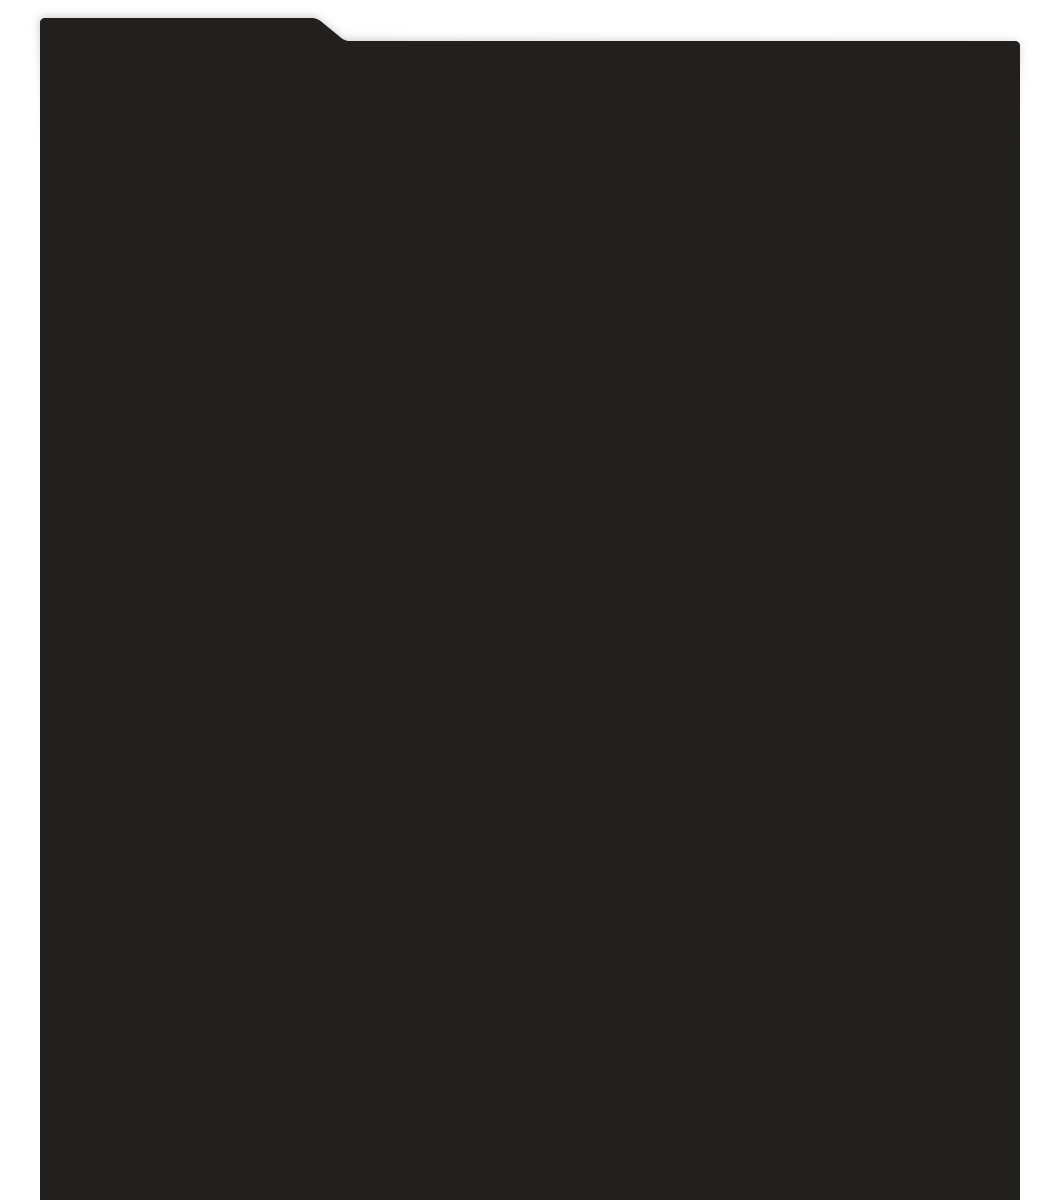
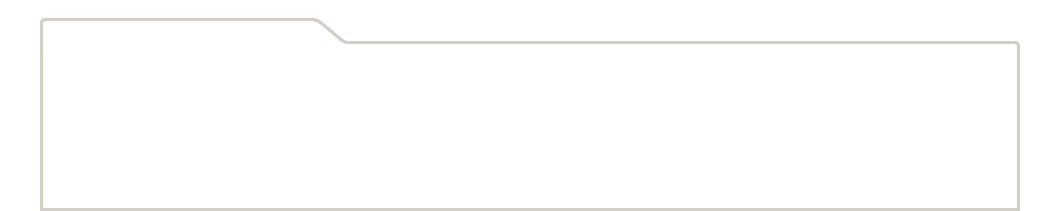
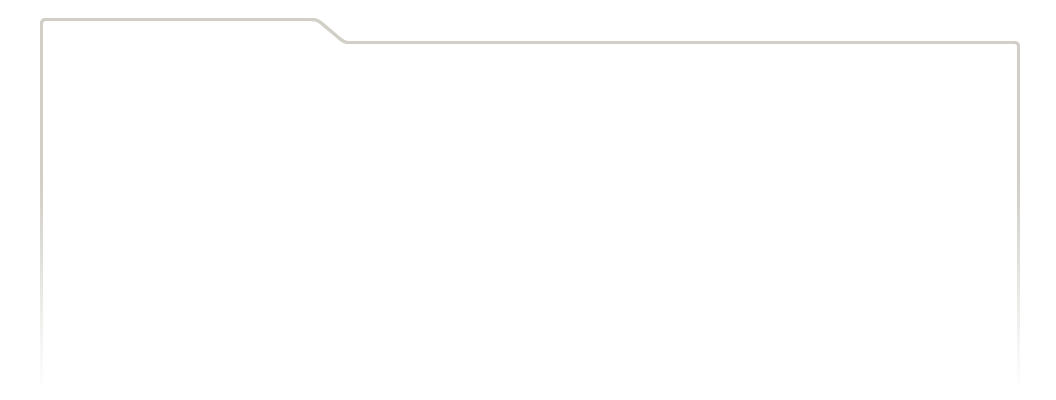
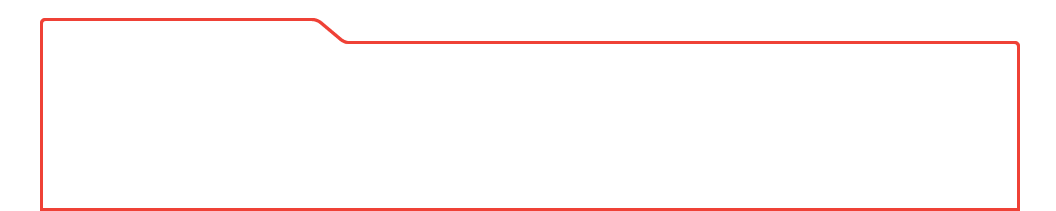
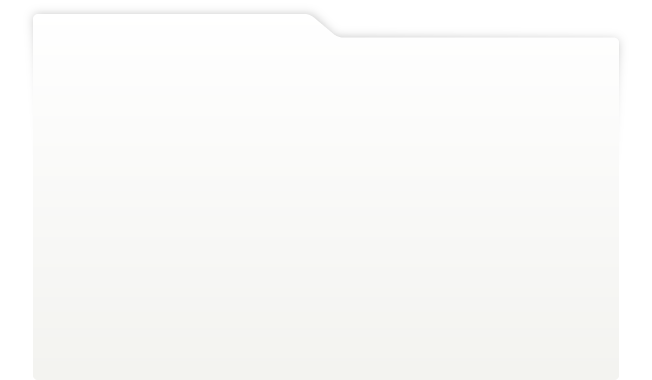
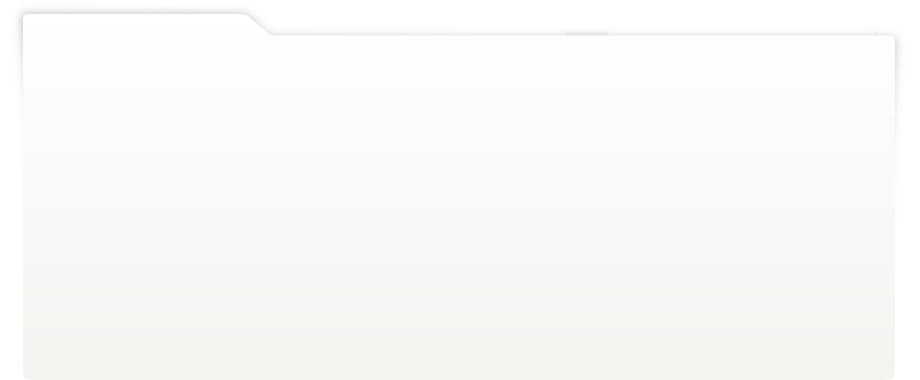
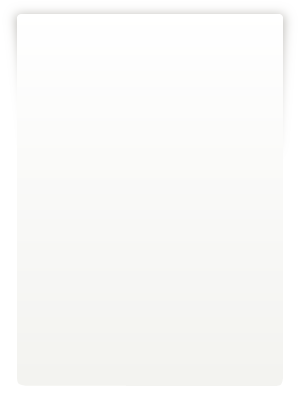
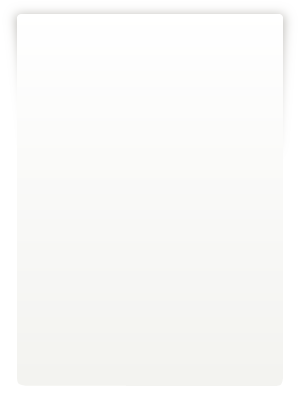
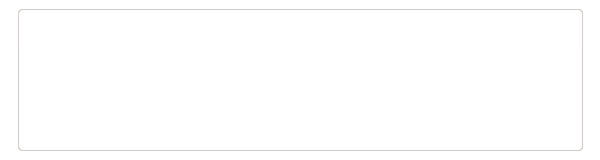
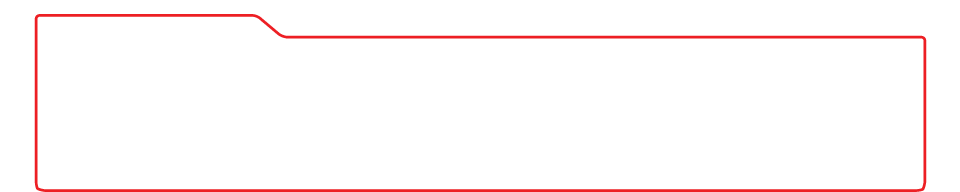
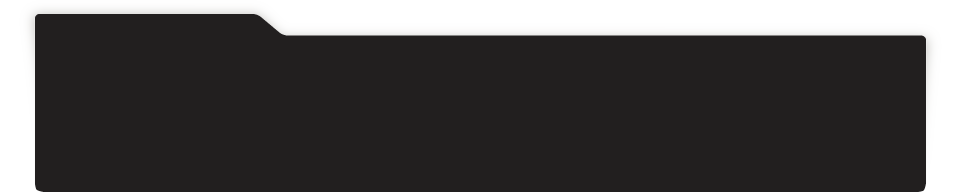
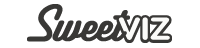
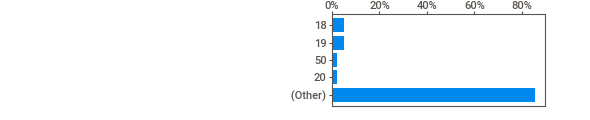
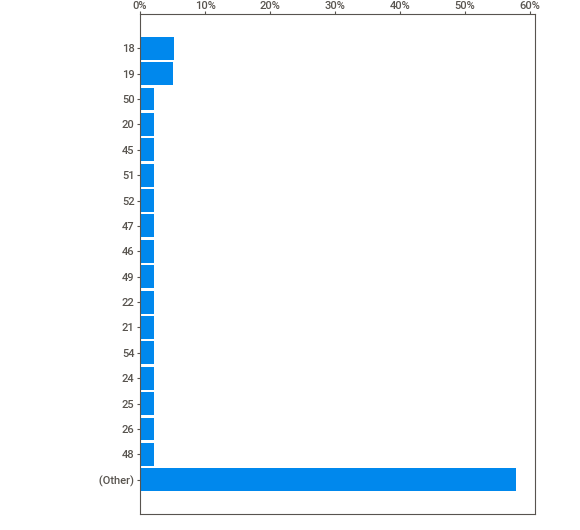
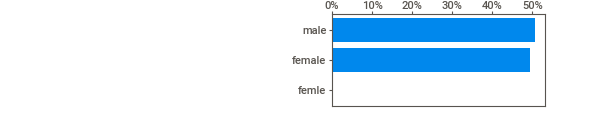
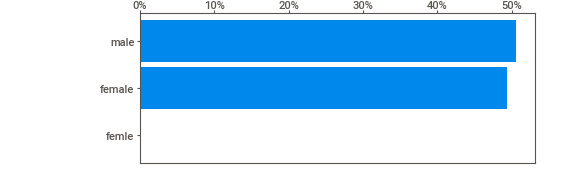
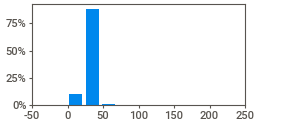
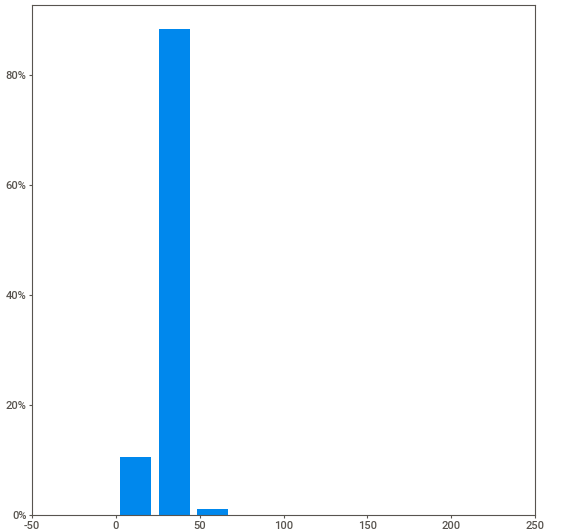
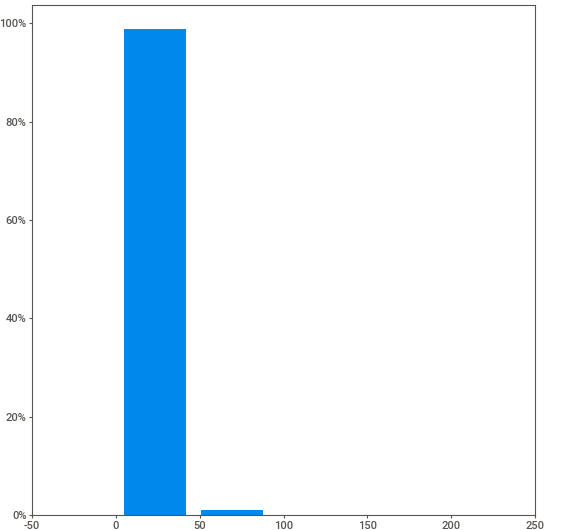
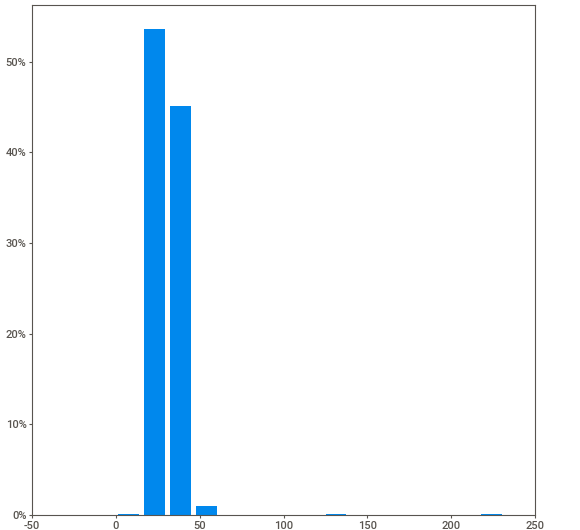
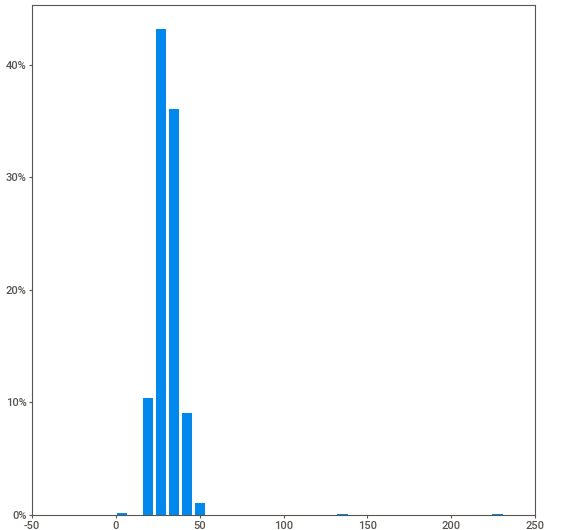
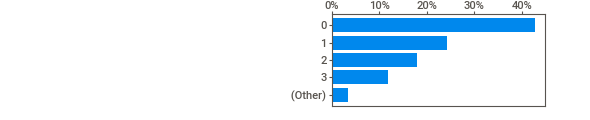
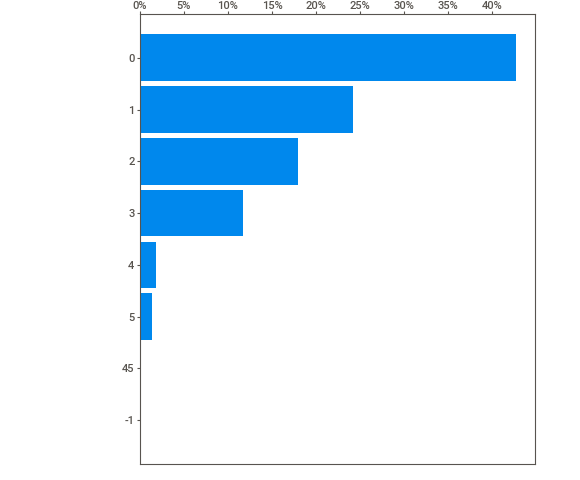
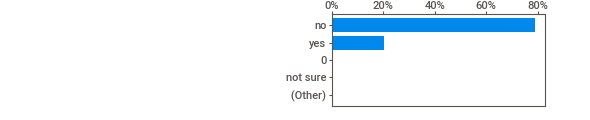
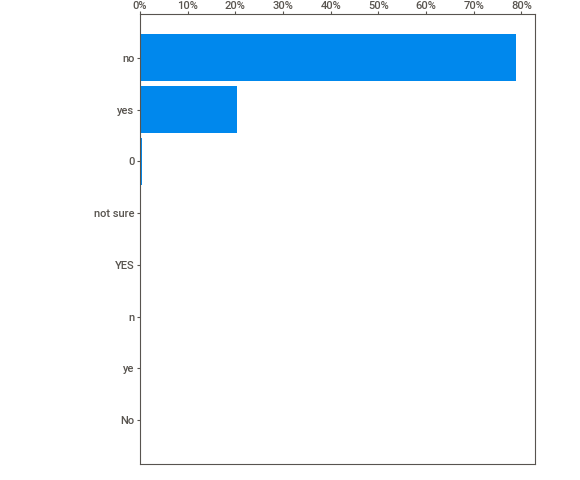
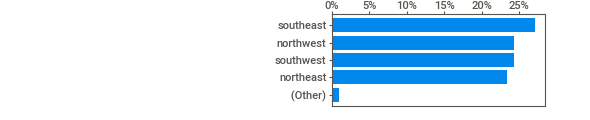
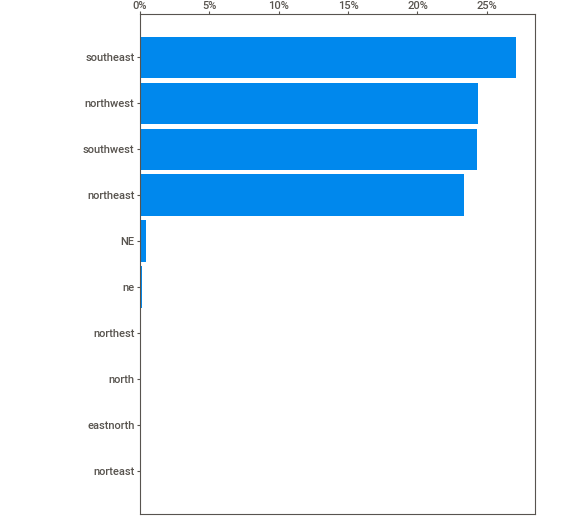
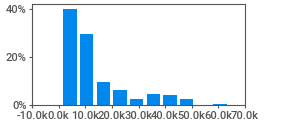
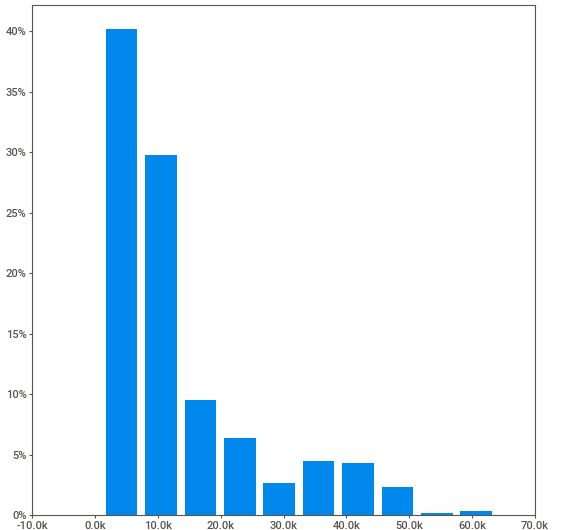
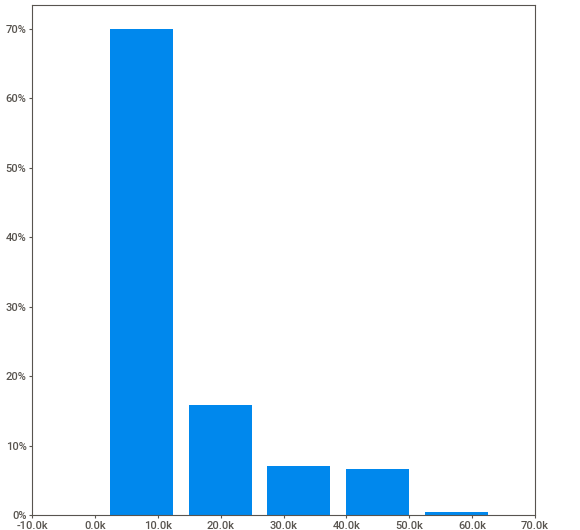
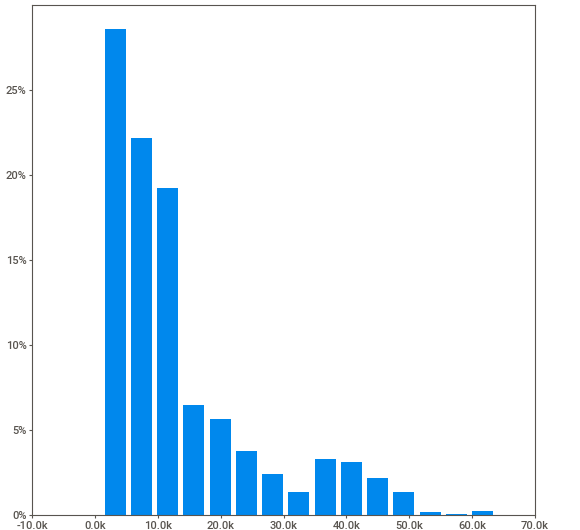
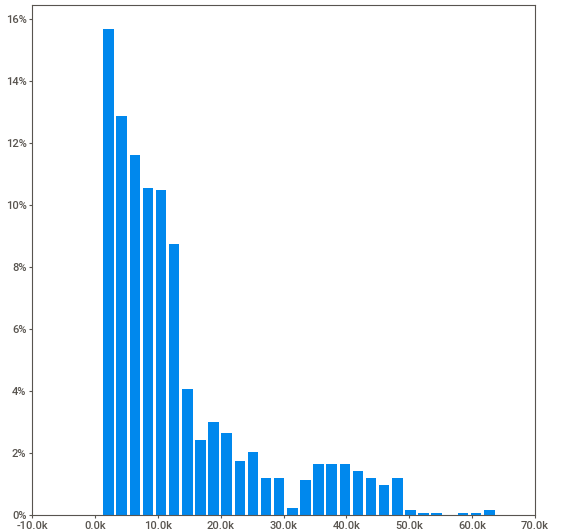
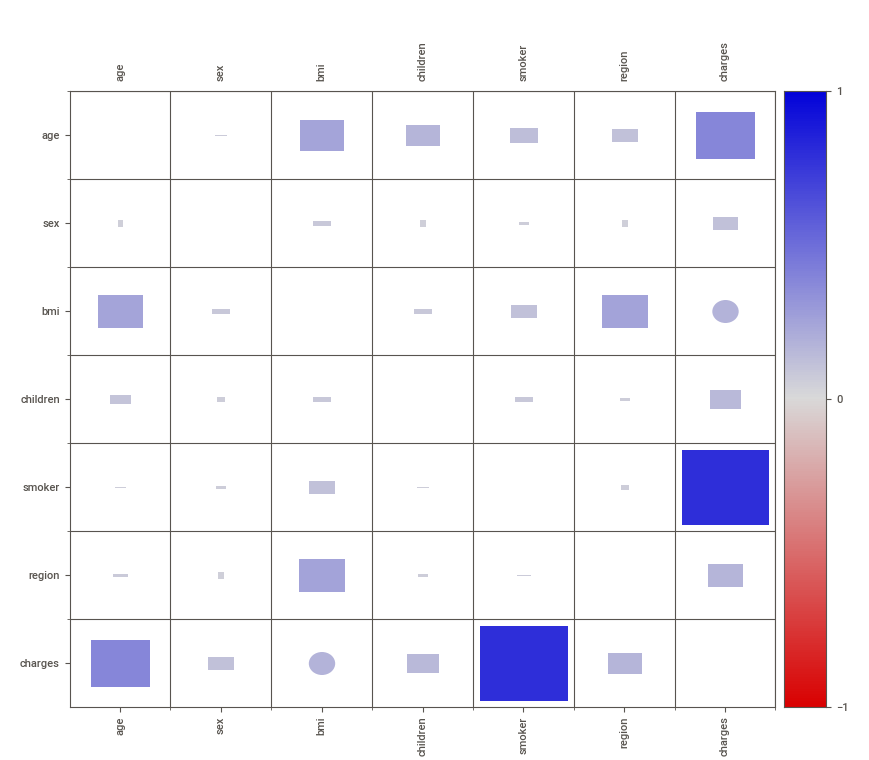
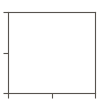

In [85]:
# Use SweetViz for data analysis and visualization
report = sv.analyze(insurance_data)
report.show_html("sweetviz_report.html")

#Show HTML File
# IFrame(src='sweetviz_report.html', width=800, height=600)
HTML('sweetviz_report.html')

### Data Cleaning

Missing values in datasets pose a significant challenge in machine learning. The presence of dirty data, which requires cleaning, can be categorized into various origins, including inconsistent and incomplete data. Inconsistency encompass different forms of the same word, such as "US," "USA," "United States," and so on.
Incompleteness, another category of dirty data, refers to missing or insufficient information. For instance, consider a dataset containing information about individuals, including their age, gender, and occupation. If some entries have missing age values, it exemplifies the issue of incompleteness within the dataset.

<font color='#D61E85' size='+2'>**Q11:**</font> Dirty data have other origins, such as duplicate, incorrect, and inaccurate data. Try to explain the latter two with the help of examples.


<font color='#8FCF26' size='+2'>**A11:**</font>

1. **Incorrect Data**:
   - **Definition**: Incorrect data refers to information that is factually wrong or does not adhere to established standards or norms.
   - **Example**: In a dataset containing the heights of individuals in centimeters, if a value of 1800 cm (18 meters) is recorded for someone's height, it's incorrect data. It doesn't align with the standard range of human heights and is likely due to a data entry error.

2. **Inaccurate Data**:
   - **Definition**: Inaccurate data implies that the information may have been correct at some point but is no longer valid or up to date.
   - **Example**: Consider a dataset that tracks the employment status of individuals. If a record indicates that a person is employed as of the latest update, but in reality, that person lost their job a year ago, it's inaccurate data. The information is outdated and no longer reflects the person's actual status.


<font color='#D61E85' size='+2'>**Q12:**</font> There are two strategies for dealing with incomplete/missing data: *preserving* data points and *ignoring* the missing data. *Ignoring* missing data by dropping rows and columns containing the missing value is destructive. A better solution could be to try to fill these missing values. What are our options for filling these cells in the data?

<font color='#8FCF26' size='+2'>**A12:**</font>

When dealing with incomplete or missing data, there are several strategies for filling these missing values to preserve as much of the data as possible. The choice of strategy depends on the nature of the data and the specific problem we are trying to solve. Here are some common options for filling missing values:

1. **Mean, Median, or Mode Imputation**:
   - For numerical columns, we can fill missing values with the mean, median, or mode of the column. This method is simple and effective for maintaining data distribution.
   - For categorical columns, fill missing values with the mode (most frequent category).

2. **Forward Fill and Backward Fill**:
   - In time-series data, we can use forward fill (carry the last observed value forward) or backward fill (use the next observed value) to fill missing values.

3. **Interpolation**:
   - For time-series or numerical data, we can use interpolation techniques like linear interpolation or spline interpolation to estimate missing values based on adjacent data points.

4. **Predictive Modeling**:
   - We can use machine learning models to predict missing values based on the relationships between variables. This is especially useful when the missing data is not completely at random.

5. **Domain-Specific Values**:
   - In some cases, domain-specific knowledge can guide the imputation process. For example, we may fill missing data with values that make sense based on the context of the data.

6. **Deletion**:
   - While not a filling strategy, sometimes it's appropriate to delete rows or columns with missing values if they are few and won't significantly impact the analysis. This is often done when the missing data is not at random.

7. **Multiple Imputation**:
   - Multiple imputation is a more advanced technique that involves creating multiple datasets with imputed values to account for uncertainty in the imputation process. It can provide more accurate estimates of missing values.

8. **Zero or Specific Value**:
   - We can fill missing values with zeros or a specific value if it's relevant to the problem. For example, in a dataset of product sales, missing sales data for a specific day might be filled with zeros.

9. **Binning**:
   - For continuous numerical data, We can bin the data into intervals and assign missing values to a specific bin/category.

An essential step in data cleaning is to check for validity. What is considered invalid data? check [this link](https://en.wikipedia.org/wiki/Data_cleansing#Data_quality) to find out.

<font color='#D61E85' size='+2'>**Q13:**</font> Using the information provided untill now, try to clean the data provided for this exercise. Try to use `fillna()`, `SimpleImputer`, `KNNImputer`, and `IterativeImputer` as *preserving* approaches. What is your preferred strategy? "most_frequent", "mean", "median", ... . Explain your decision.

<font color='#8FCF26' size='+2'>**A13:**</font> Create some cell down below to write and run your code.

#### dealing with wrong value

In [86]:
# age:

from word2number import w2n
import re

# Function to convert text to numbers
def text_to_number(text):
    try:
        return w2n.word_to_num(text)
    except ValueError:
        try:
          return int(float(text))
        except ValueError:
          return np.nan  # Return the null value if it can't be converted


# Apply the conversion function to the 'age' column
insurance_data['age'] = insurance_data['age'].apply(text_to_number)
insurance_data['age'] = insurance_data['age'].apply(lambda x: x if 0<x<100 else np.nan)

#bmi
insurance_data['bmi'] = insurance_data['bmi'].apply(lambda x: x if 10<x<60 else np.nan)


In [87]:
# Count the unique values in the categorical column
for value in categorical_value:
  print(insurance_data[value].value_counts())
  print('\n\n')

male      675
female    658
femle       1
Name: sex, dtype: int64



 0     572
 1     324
 2     240
 3     157
 4      25
 5      18
 45      1
-1       1
Name: children, dtype: int64



no          1056
yes          272
0              5
not sure       1
YES            1
n              1
ye             1
No             1
Name: smoker, dtype: int64



southeast    362
northwest    325
southwest    324
northeast    312
NE             6
ne             2
northest       1
north          1
eastnorth      1
norteast       1
Name: region, dtype: int64





In [88]:
f = lambda x: 0 if x<0 else 0 if x==0 else 1

In [89]:
f(5)

1

In [90]:
#sex
insurance_data['sex'] = insurance_data['sex'].apply(
    lambda x: 0 if x=='femle' or x=='female' else 1 if x=='male' else np.nan )

#children
insurance_data['children'] = insurance_data['children'].apply(lambda x: int(x) if 0<=x<=5 else np.nan)

#smoker
def cleaning_wrong_smoker(x):
  if x in ['no', 0, 'n', 'No', '0', 'not sure']:
    return 0
  elif x in ['yes', 'YES', 'ye', 1]:
    return 1
  return np.nan
insurance_data['smoker'] = insurance_data['smoker'].apply(cleaning_wrong_smoker)

#region
insurance_data['region'] = insurance_data['region'].apply(lambda x: 'northeast' if x in ['NE', 'ne', 'northest', 'north', 'eastnorth', 'norteast'] else x)



In [91]:
# Count the unique values in the categorical column
for value in categorical_value:
  print(insurance_data[value].value_counts())
  print('\n\n')

1.0    675
0.0    659
Name: sex, dtype: int64



0.0    572
1.0    324
2.0    240
3.0    157
4.0     25
5.0     18
Name: children, dtype: int64



0    1064
1     274
Name: smoker, dtype: int64



southeast    362
northwest    325
southwest    324
northeast    324
Name: region, dtype: int64





#### dealing with missing value



In [92]:
insurance_data.isna().sum()


age          2
sex          4
bmi          5
children     2
smoker       0
region       3
charges     11
dtype: int64

**Preferred Strategy:**

The preferred strategy for imputing missing values depends on the nature of the data and the goals of the analysis. Here's a general guideline:

- For categorical columns, using `mode` is a straightforward choice.
- For numerical columns with a relatively normal distribution, using  with `mean` can work well.
- For numerical columns with potential outliers or skewed distributions, using  `median` can provide robust results.
- If the dataset has a meaningful distance metric and the relationships between features matter, `KNNImputer` or `IterativeImputer` may be more suitable.


According to the previous explanation, a strategy has been used for each column

In [93]:
#  identify which columns are impute with mode, mean, median
mode_columns = ['sex', 'children', 'region']
mean_columns = ['bmi']
median_columns = ['age', 'charges']

# Impute Missing Values
insurance_data[mode_columns] = insurance_data[mode_columns].fillna(insurance_data[mode_columns].mode().iloc[0])
insurance_data[mean_columns] = insurance_data[mean_columns].fillna(insurance_data[mean_columns].mean())
insurance_data[median_columns] = insurance_data[median_columns].fillna(insurance_data[median_columns].median())

# Verify the Result
insurance_data.isna().sum()


age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

### Split Dateset

At last, you need to split the data to train, validation, and test splits. <font color='#D61E85' size='+2'>**Q5:**</font> Why we do this and what is the use of each of them?

Rememeber from now on, you must only consider training and validation sets in your analysis and you are not allowed to use the test set except for prediction.

<font color='#8FCF26' size='+2'>**A5:**</font>

1. **Training Data**:
   - **Purpose:** The training dataset is used to train the machine learning model. The model learns patterns and relationships in the data, enabling it to make predictions or classifications.
   - **Use:** The model is fitted to the training data, and its parameters (weights and biases) are adjusted to minimize the training error. The training data helps the model generalize from the examples it has seen and learn to make accurate predictions on new, unseen data.

2. **Validation Data**:
   - **Purpose:** The validation dataset is used to fine-tune the model's hyperparameters and assess its performance during training. It helps in preventing overfitting and selecting the best model.
   - **Use:** During training, the model's hyperparameters (e.g., learning rate, regularization strength) are adjusted using the validation data. The validation set provides an independent measure of the model's performance and helps in early stopping when the model's performance on the validation data starts to degrade. This prevents the model from becoming too specific to the training data.

3. **Test Data**:
   - **Purpose:** The test dataset is used to evaluate the final performance of the trained model. It provides an unbiased estimate of the model's accuracy on unseen data.
   - **Use:** After the model is fully trained and the hyperparameters are tuned, the test data is used to assess how well the model will perform in real-world scenarios. It provides an objective measure of the model's generalization ability and ensures that the model has not overfit to the training data.

In summary, the primary reasons for splitting data into training, validation, and test sets are:

- *Training data is used to train the model and enable it to make predictions.*
- *Validation data is used to fine-tune the model's hyperparameters and monitor its performance during training.*
- *Test data is used to evaluate the model's final performance and ensure it can make accurate predictions on new, unseen data.*

This separation helps in building models that are more likely to perform well in real-world scenarios and avoid issues like ***overfitting***.


<font color='#D61E85' size='+2'>**Q6:**</font> Split the dataset into training, validation, and test sets using the following ratios: 70% for training, 10% for validation, and 20% for testing.
<font color='#8FCF26' size='+2'>**A6:**</font> Create some cell down below to write and run your code.

In [94]:
import numpy as np
from sklearn.model_selection import train_test_split

# Set a random state for reproducibility
random_state = 42

# Split the data into features (X) and target (y)
X = insurance_data.drop(columns=['charges'])
y = insurance_data['charges']

# First, split the data into training (70%) and temporary (30%)
X_train_temp, X_temp, y_train_temp, y_temp = train_test_split(X, y, test_size=0.3, random_state=random_state)

# Then, split the temporary data into validation (10%) and test (20%)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=2/3, random_state=random_state)

# Now we have X_train, y_train for training, X_val, y_val for validation, and X_test, y_test for testing


##	Explore and Visualize the Data to Gain Insights

What we did so far was just a quick glance on the data. Now, it's time to get deeper insights about the data.


### Visualizing Geographical Data

Histograms, boxplot, pie charts, doughnut charts, line charts, multi-series line charts, bar charts, column charts, stacked bar charts, area charts, scatter plots, bubble charts, etc, are among the charts and diagrams you can draw for the dataset.

<font color='#D61E85' size='+2'>**Q7:**</font> Draw some charts and diagrams. You don't need to use all of them, just the ones that will help you to understand the dataset better.

<font color='#8FCF26' size='+2'>**A7:**</font> Create some cell down below to write and run your code.

In [95]:
%matplotlib inline


Shape of your Data Set loaded: (1338, 7)
#######################################################################################
######################## C L A S S I F Y I N G  V A R I A B L E S  ####################
#######################################################################################
Classifying variables in data set...
    7 Predictors classified...
        No variables removed since no ID or low-information variables found in data set
To fix data quality issues automatically, import FixDQ from autoviz...
    Alert: Dropping 1 duplicate rows can sometimes cause column data types to change to object. Double-check!


,Data Type,Missing Values%,Unique Values%,Minimum Value,Maximum Value,DQ Issue
age,float64,0.000000,NA,18.000000,64.000000,No issue
sex,float64,0.000000,NA,0.000000,1.000000,No issue
bmi,float64,0.000000,NA,15.960000,53.130000,has 9 outliers greater than upper bound (47.21) or lower than lower bound(13.78). Cap them or remove them.
children,float64,0.000000,NA,0.000000,5.000000,No issue
smoker,int64,0.000000,0,0.000000,1.000000,has 274 outliers greater than upper bound (0.00) or lower than lower bound(0.00). Cap them or remove them.
region,object,0.000000,0,nan,nan,No issue
charges,float64,0.000000,NA,1121.873900,63770.428010,has 143 outliers greater than upper bound (34000.63) or lower than lower bound(-12798.67). Cap them or remove them.


Number of All Scatter Plots = 10


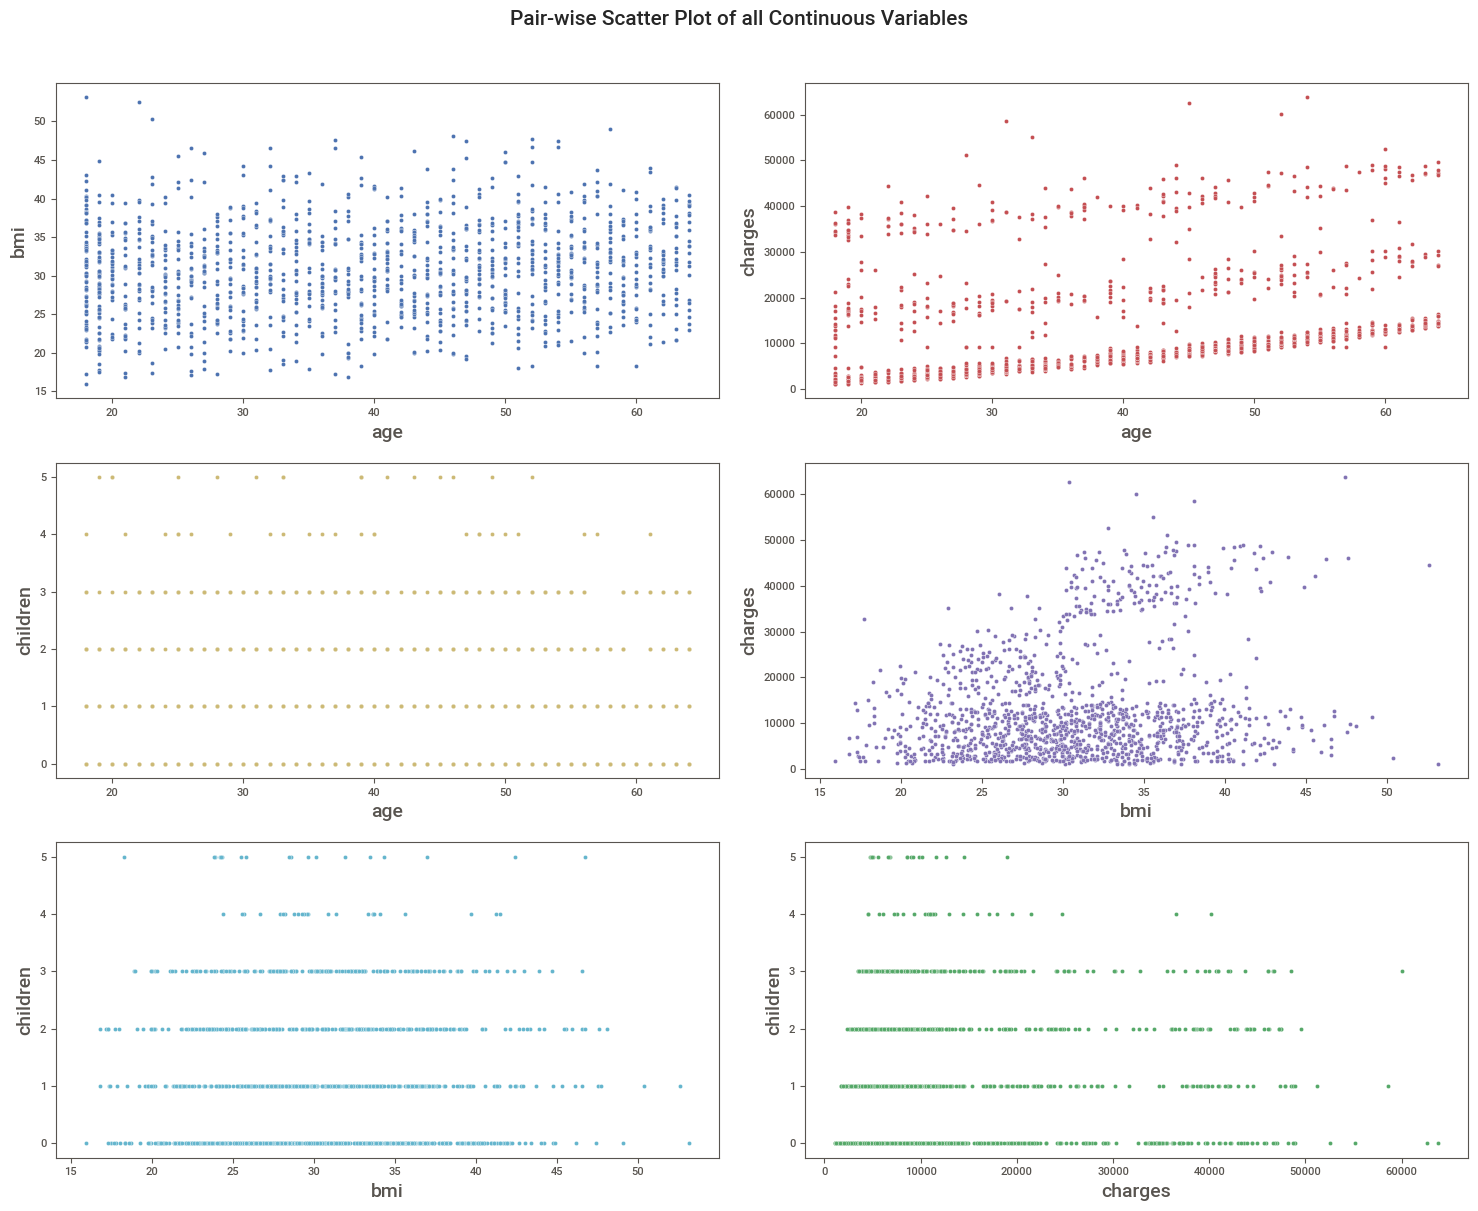

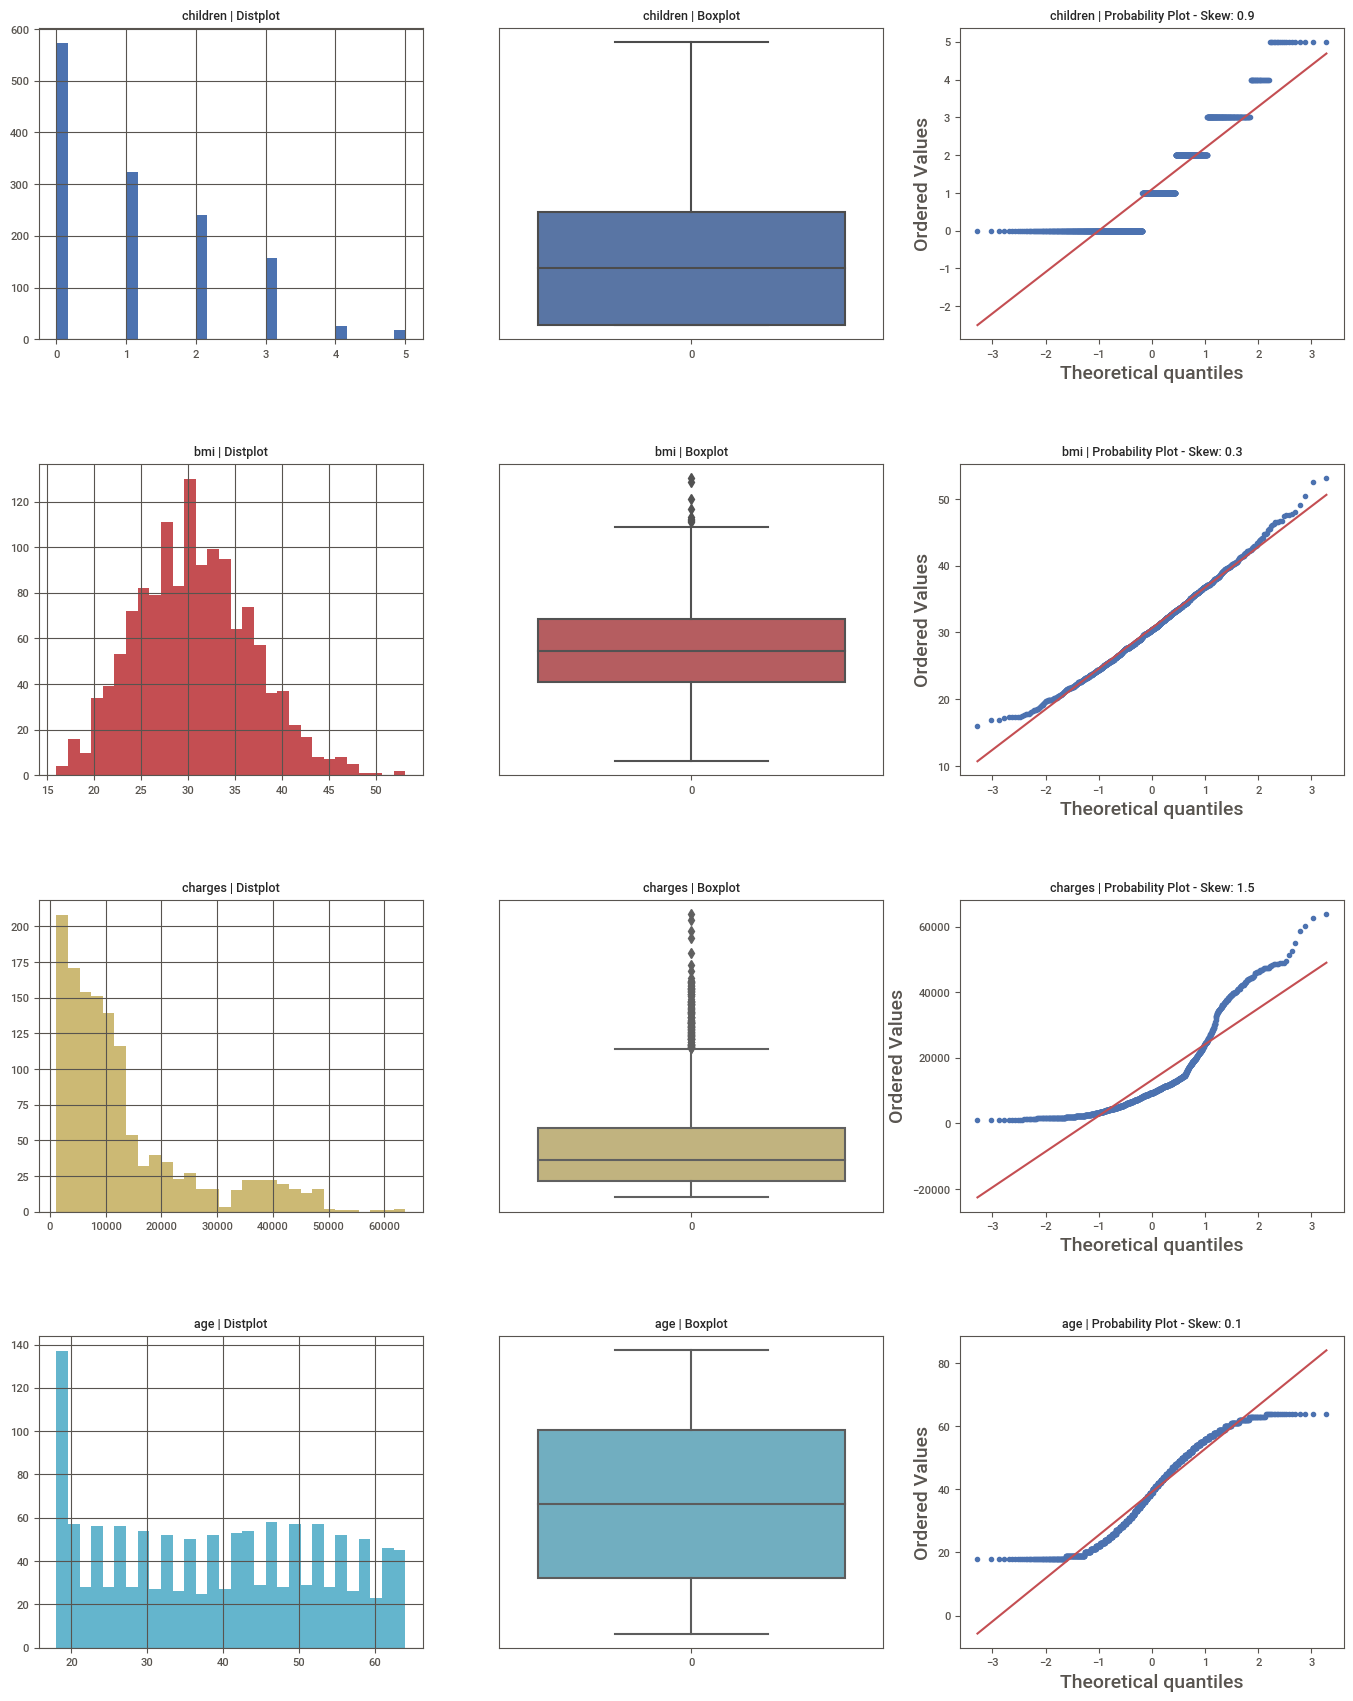

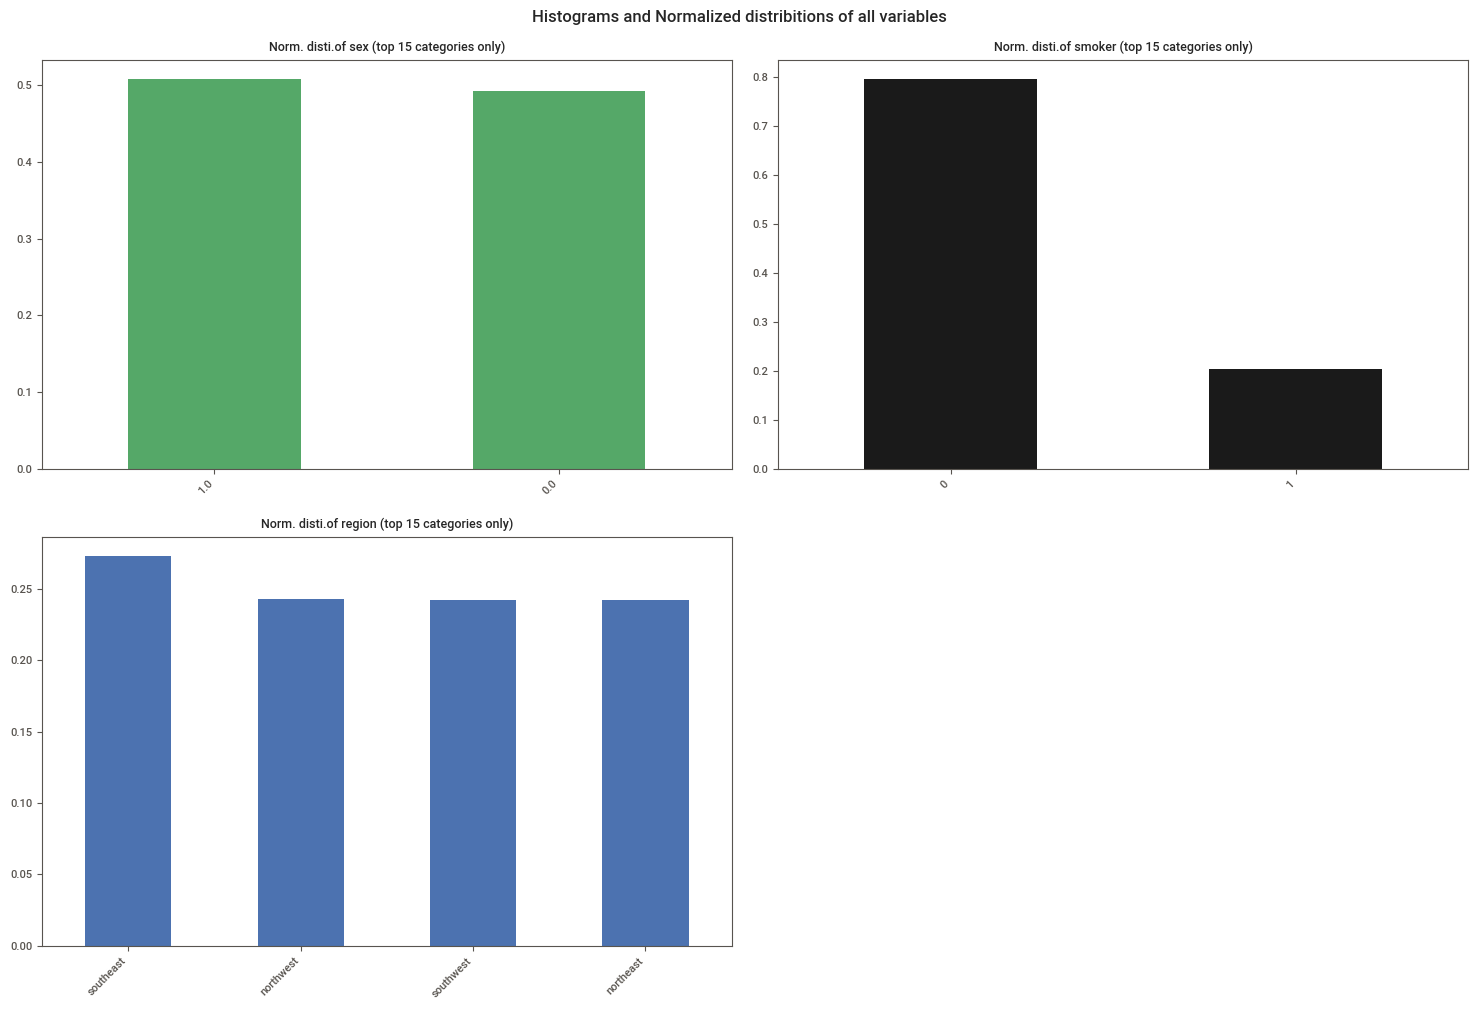

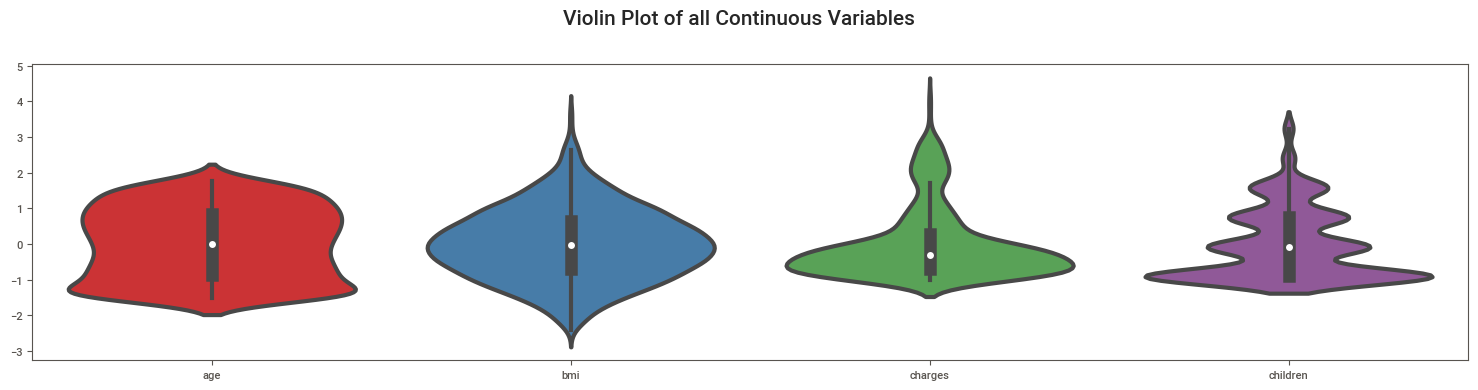

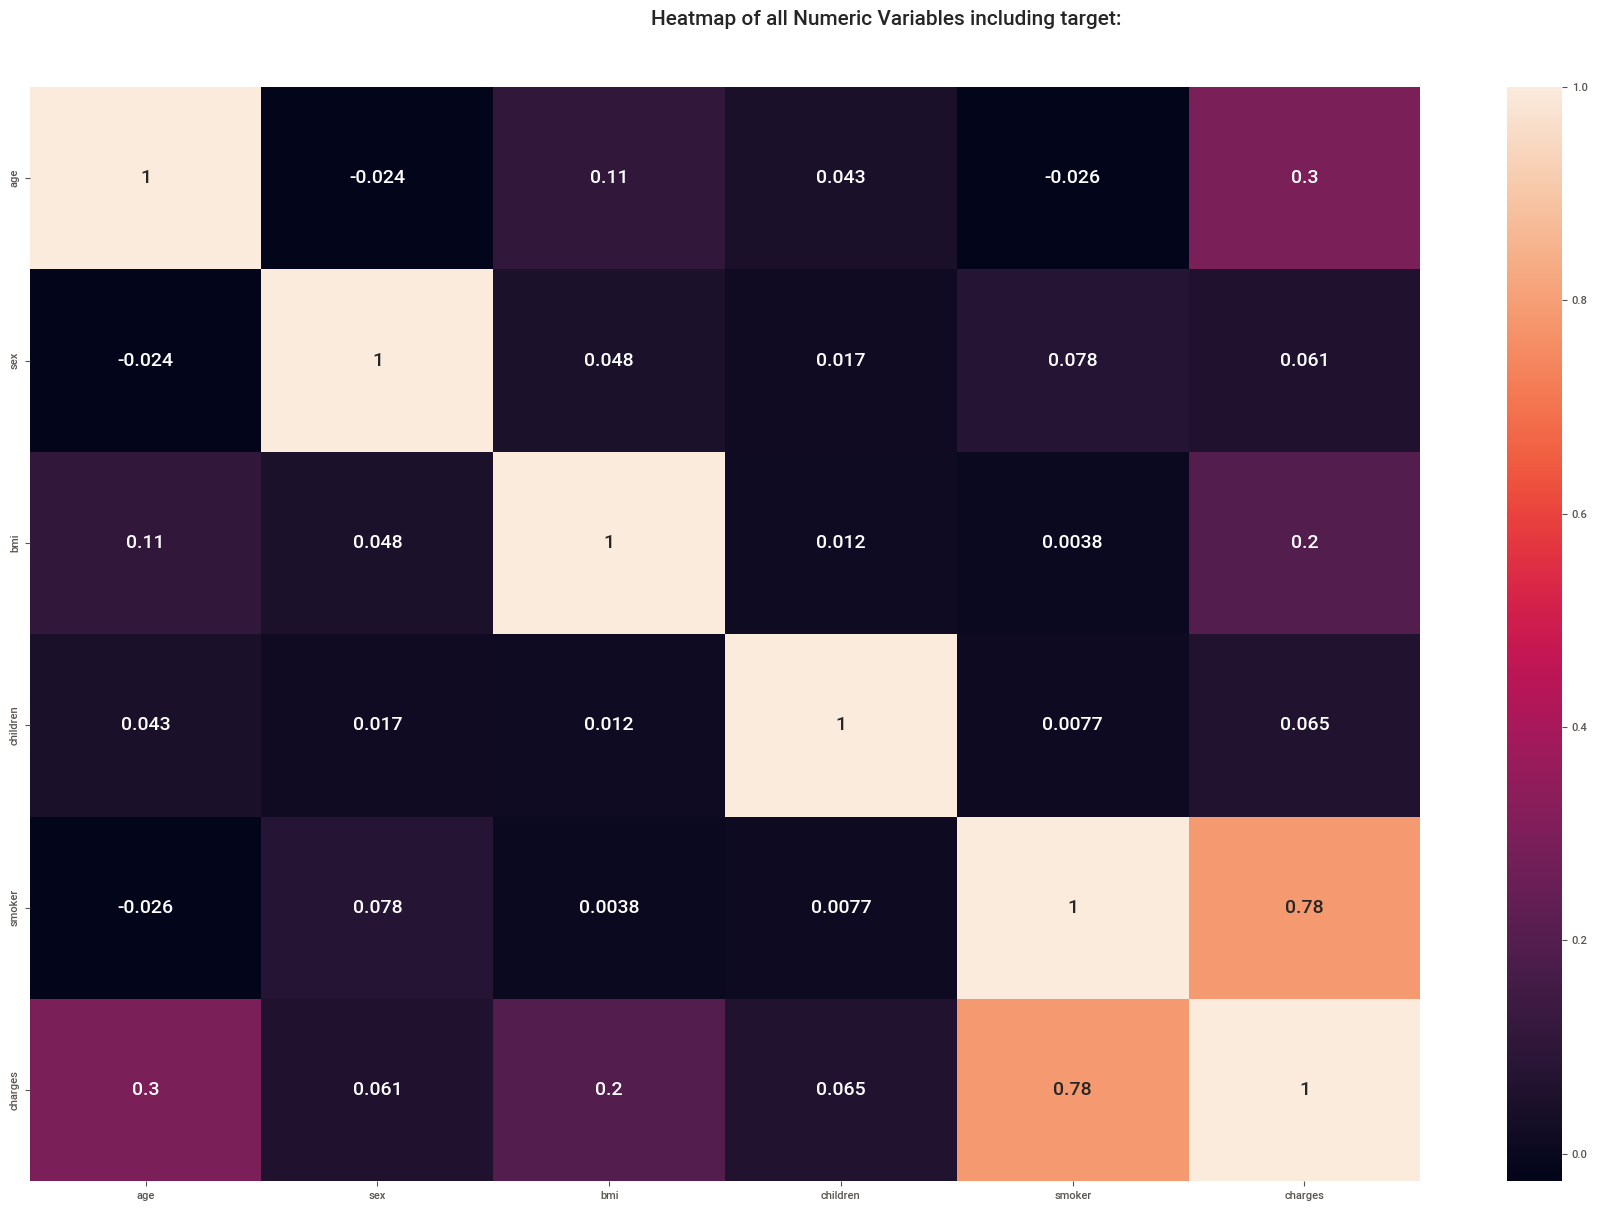

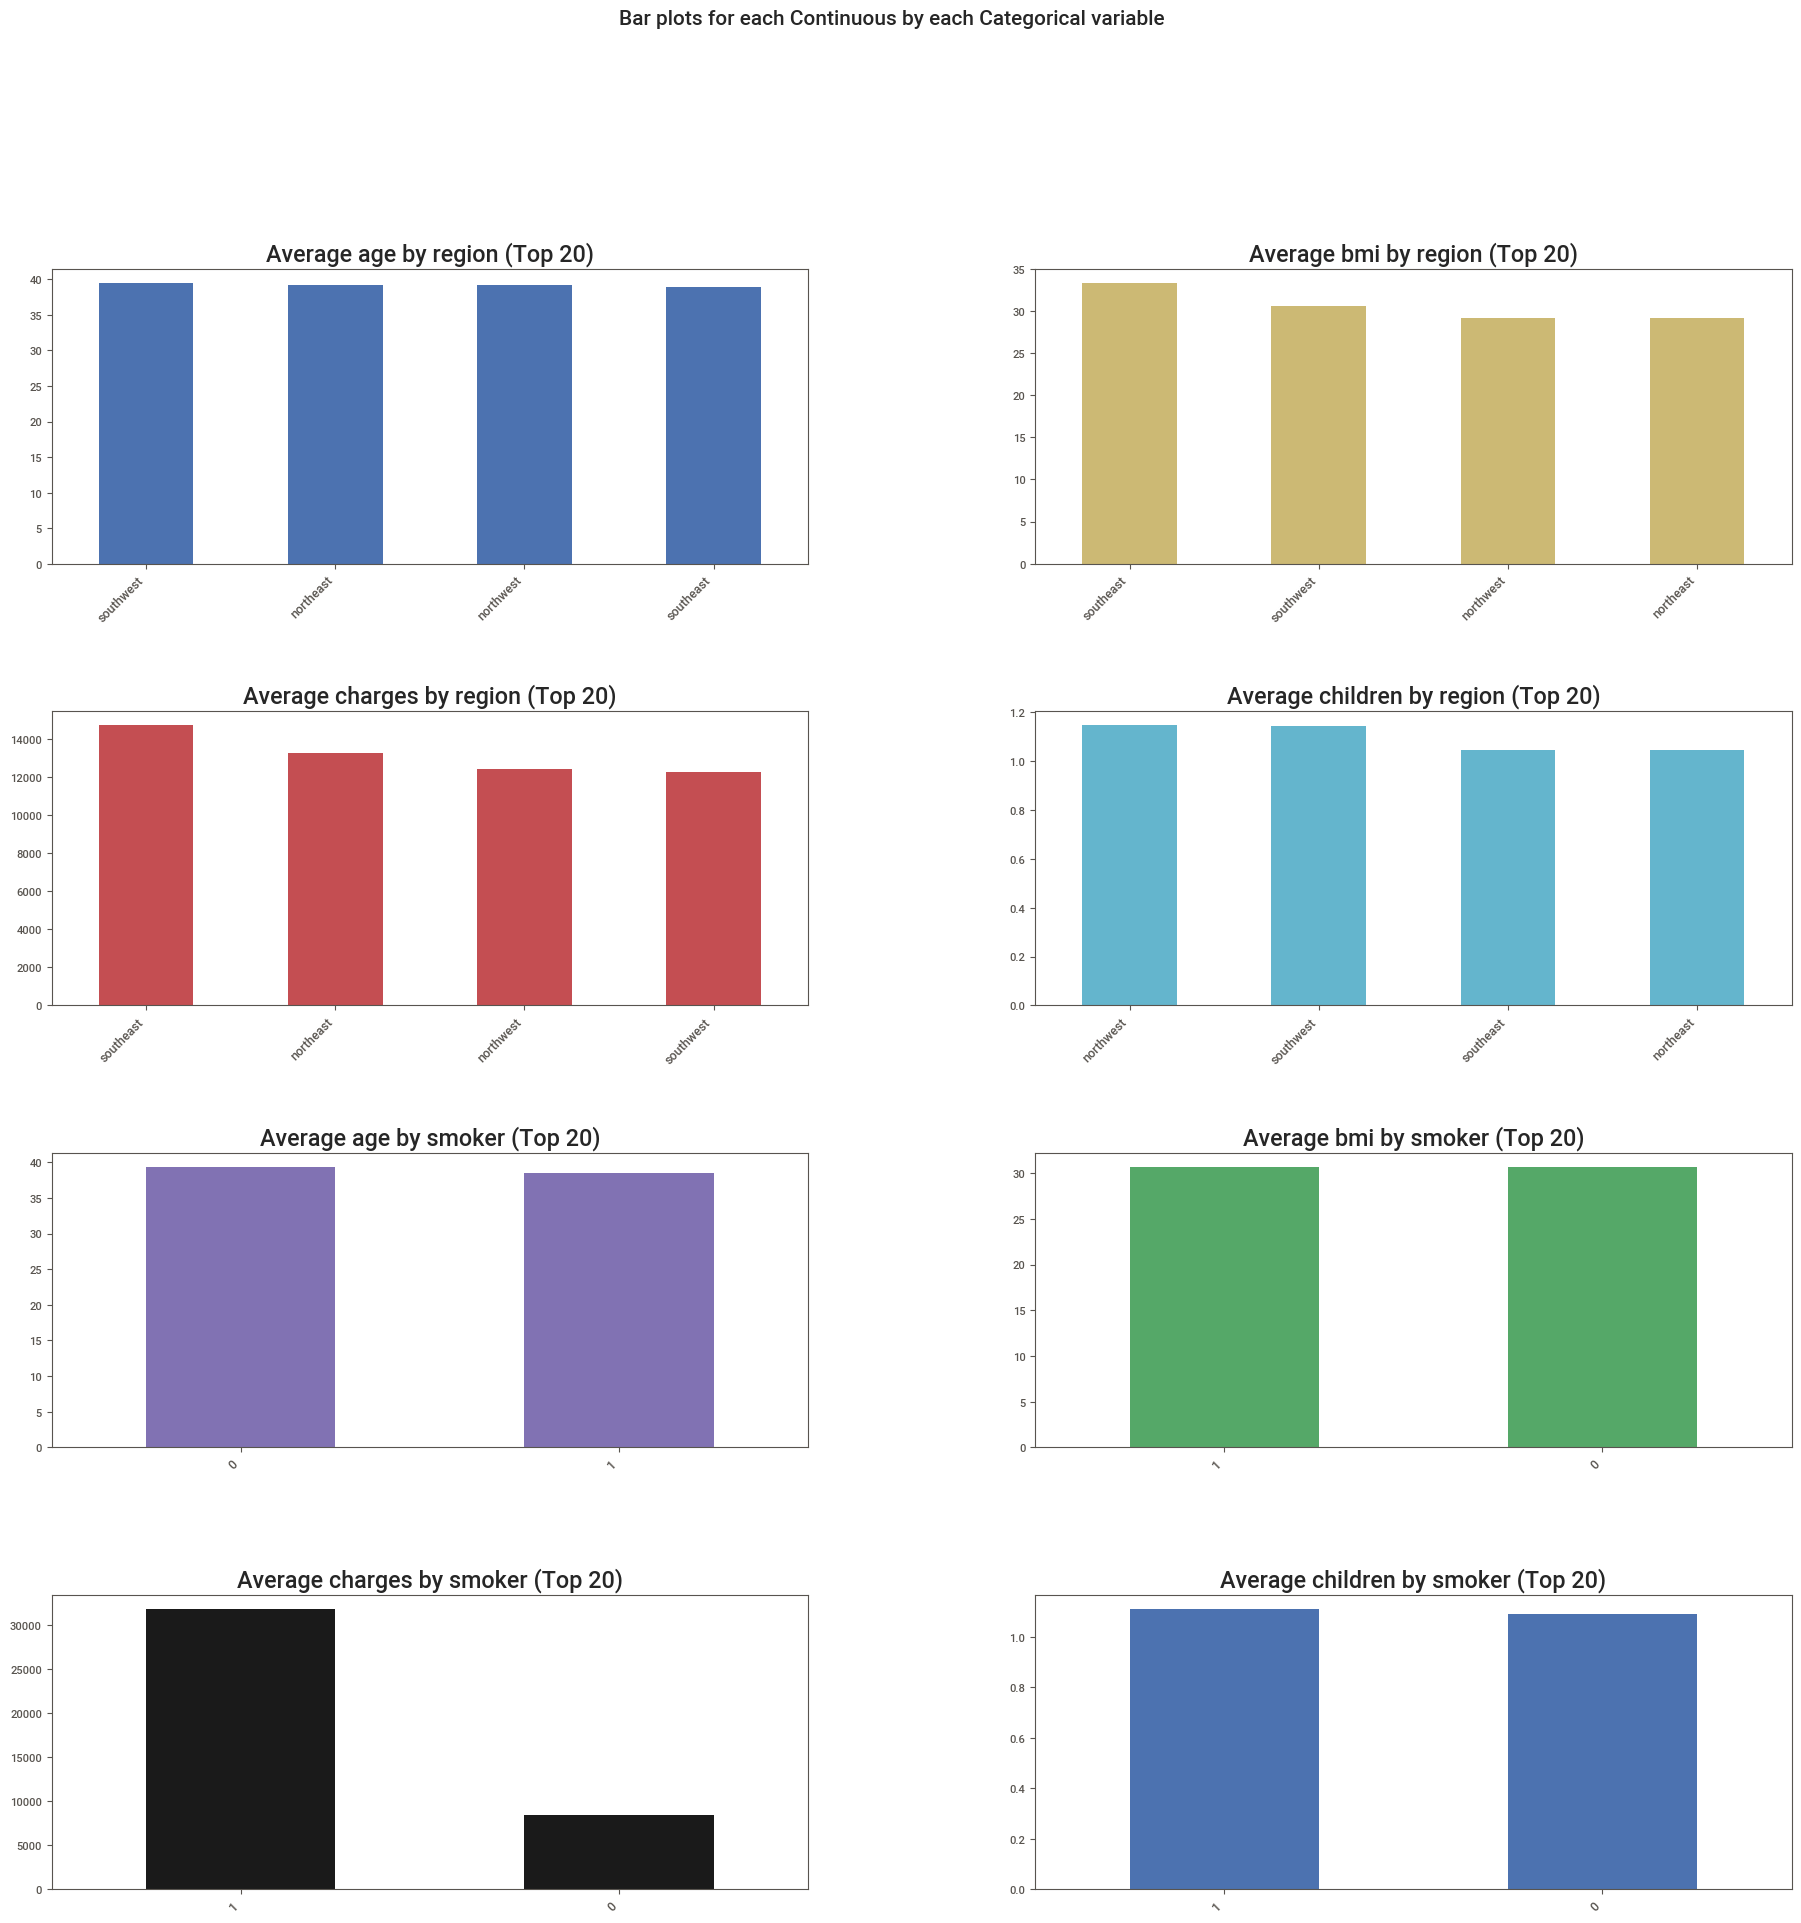

All Plots done
Time to run AutoViz = 7 seconds 

 ###################### AUTO VISUALIZATION Completed ########################


,age,sex,bmi,children,smoker,region,charges
0,19.0,0.0,27.900,0.0,1,southwest,16884.92400
1,18.0,1.0,33.770,1.0,0,southeast,1725.55230
2,28.0,1.0,33.000,3.0,0,southeast,4449.46200
3,33.0,1.0,22.705,0.0,0,northwest,21984.47061
4,32.0,1.0,28.880,0.0,0,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50.0,1.0,30.970,3.0,0,northwest,10600.54830
1334,18.0,0.0,31.920,0.0,0,northeast,2205.98080
1335,18.0,1.0,36.850,0.0,0,southeast,1629.83350
1336,21.0,0.0,25.800,0.0,0,southwest,2007.94500


In [96]:
# Use AutoViz for automatic visualization then use several visualization method
AV = AutoViz_Class()
# AV.AutoViz("insurance.csv")
AV.AutoViz("",dfte=insurance_data)

**Histogram with KDE**

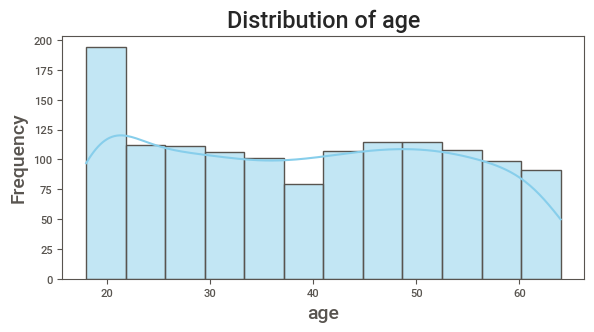

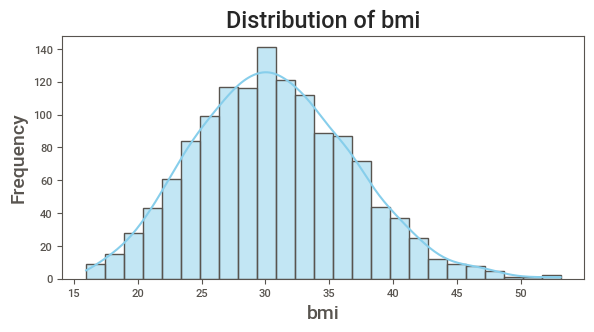

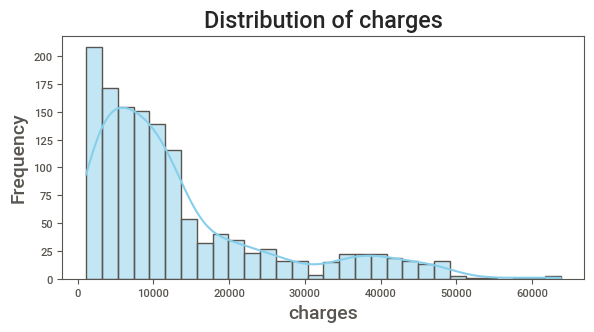

In [97]:
# numeric_value = ['age', 'bmi', 'charges']
for value in numeric_value:
  plt.figure(figsize=(6, 3))
  sns.histplot(insurance_data[value], kde=True, color='skyblue')
  plt.xlabel(value)
  plt.ylabel('Frequency')
  plt.title('Distribution of '+value)
  plt.show()
  print()


**Box Plot**

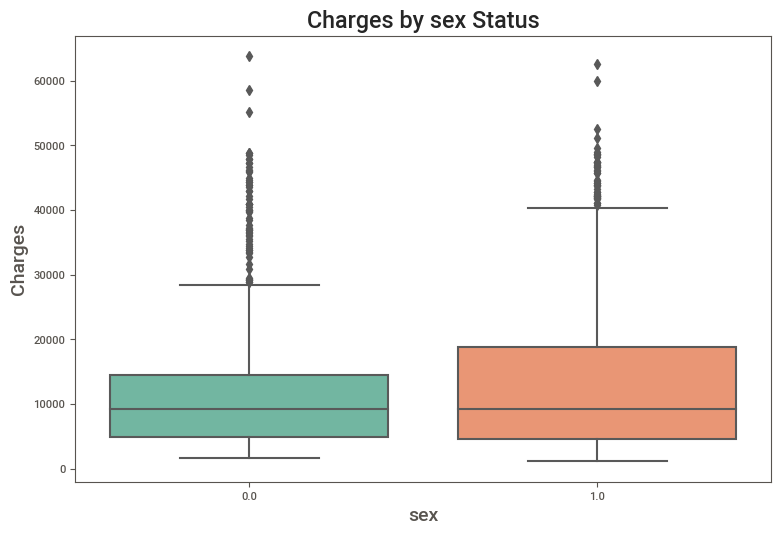

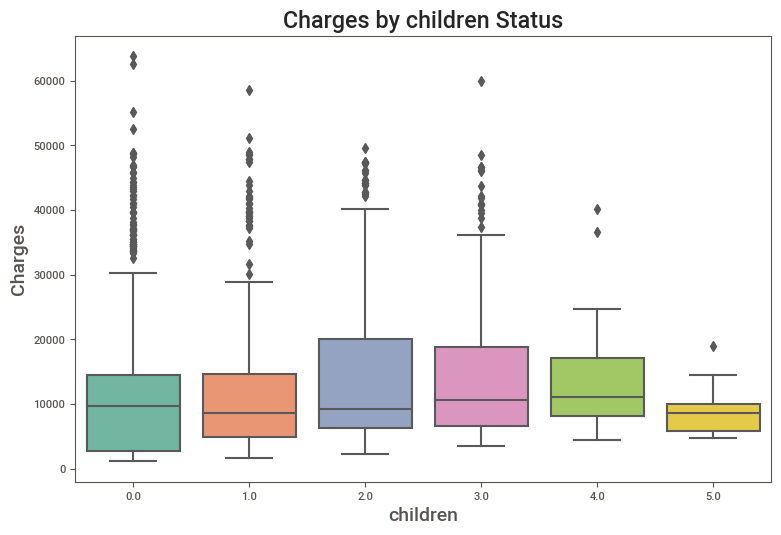

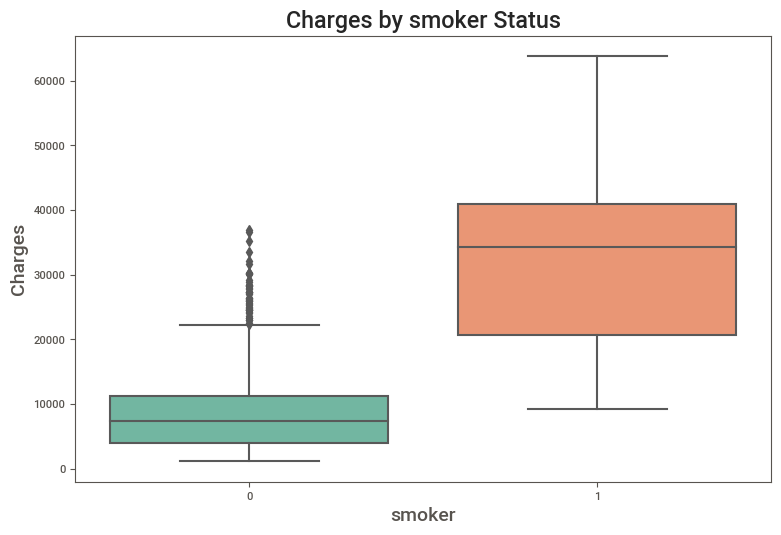

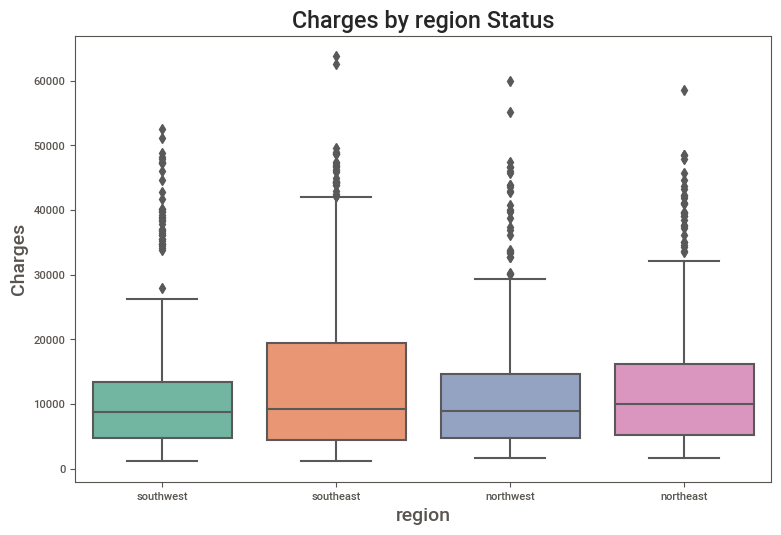

In [98]:
for value in categorical_value:
  sns.boxplot(x=value, y='charges', data=insurance_data, palette='Set2')
  plt.xlabel(value)
  plt.ylabel('Charges')
  plt.title('Charges by '+value+' Status')
  plt.show()
  print('\n\n')

**count Chart**

In [99]:
categorical_value

['sex', 'children', 'smoker', 'region']

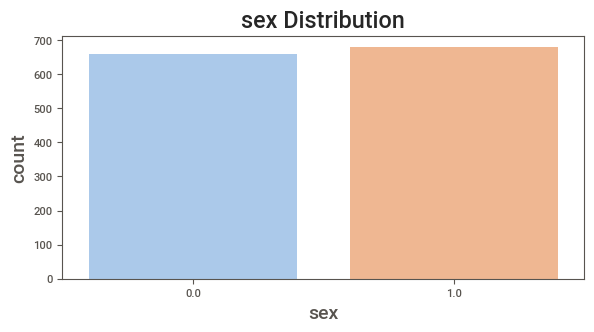

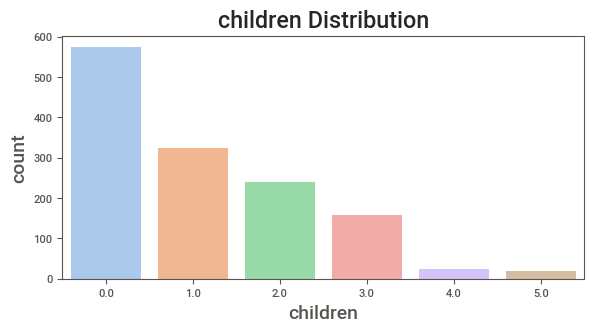

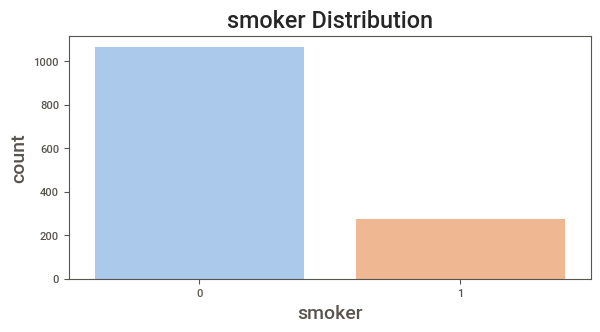

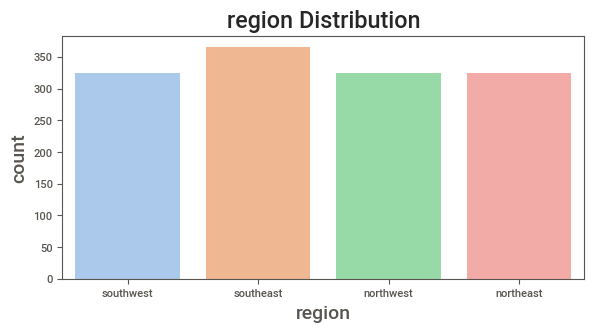

In [100]:
# Count plot for categorical data
for value in categorical_value:
  plt.figure(figsize=(6, 3))
  sns.countplot(x=value, data=insurance_data, palette='pastel')
  plt.title(value+' Distribution')
  plt.show()


**Scatter Plot**

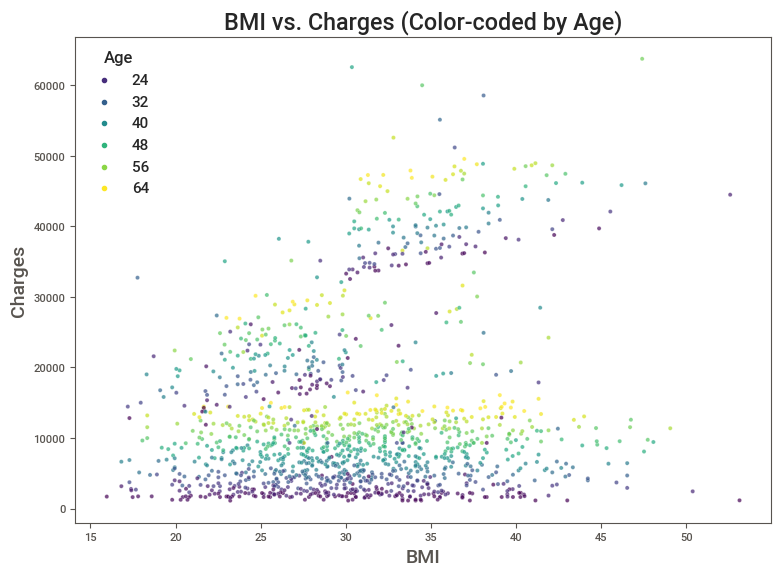

In [101]:
plt.figure(figsize=(8, 6))

sns.scatterplot(x='bmi', y='charges', hue='age', data=insurance_data, palette='viridis', alpha=0.7)
plt.xlabel('BMI')
plt.ylabel('Charges')
plt.title('BMI vs. Charges (Color-coded by Age)')
plt.legend(title='Age')
plt.show()


**Line Plot**

In [102]:
# plt.figure(figsize=(10, 4))
# sns.lineplot(x=insurance_data['region'].value_counts().index, y=insurance_data['region'].value_counts().values, marker='o')
# plt.xlabel('Region')
# plt.ylabel('Count')
# plt.title('Count of Samples by Region')
# plt.show()

**Pair Plot**

<Figure size 600x400 with 0 Axes>

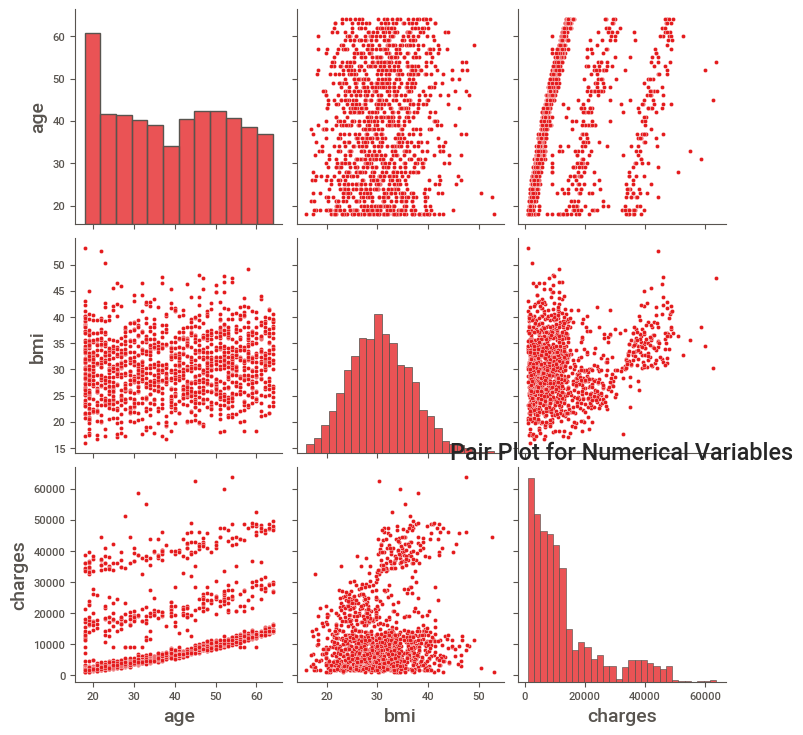

In [103]:
# Pair plot for numerical variables
plt.figure(figsize=(6, 4))
sns.pairplot(insurance_data[numeric_value])
plt.title('Pair Plot for Numerical Variables')
plt.show()

**Heatmap**

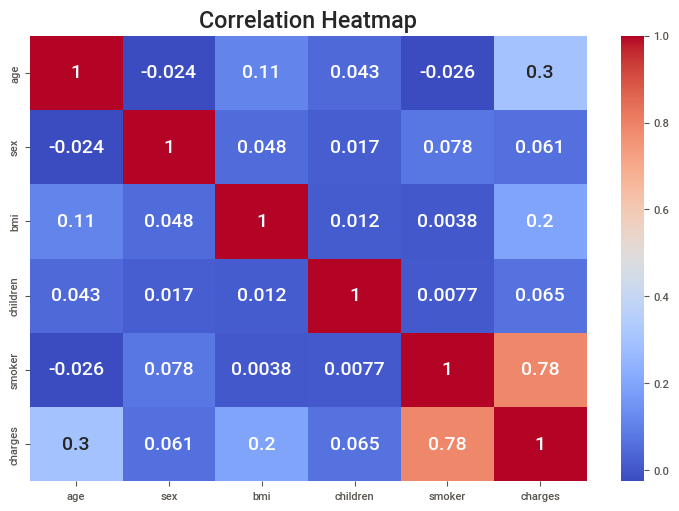

In [104]:
# Heatmap of correlations
corr_matrix = insurance_data.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

###	Look for Correlations

At first, what is correlation? You can use the video provided below to learn more about Pearson Correlation.

[Pearson's Correlation, Clearly Explained!!!](https://www.youtube.com/watch?v=xZ_z8KWkhXE)

<font color='#D61E85' size='+2'>**Q8:**</font> Try to find the correlation between the `charges` column which we want to predict and every other columns using `corr` method. What is the interpretation of these numbers?

<font color='#8FCF26' size='+2'>**A8:**</font> Create some cell down below to write and run your code.

Correlation values range from -1 to 1, where:

* A correlation of 1 indicates a perfect positive linear
relationship.
* A correlation of -1 indicates a perfect negative linear relationship.
* A correlation close to 0 indicates little to no linear relationship.

<Axes: >

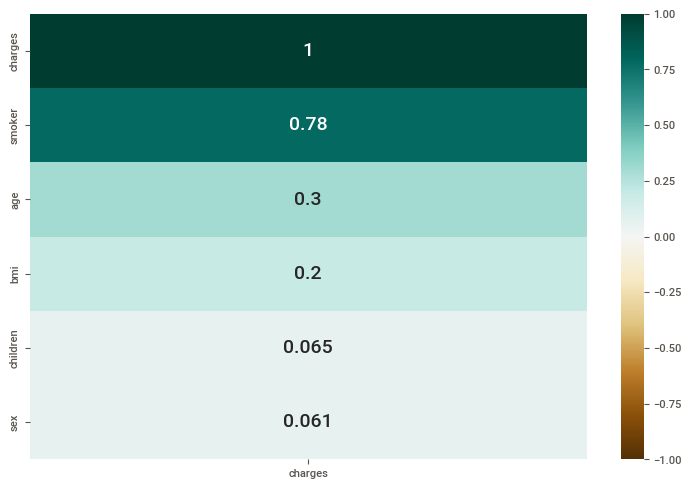

In [105]:
sns.heatmap(corr_matrix[['charges']].sort_values(by='charges', ascending=False), vmin=-1, vmax=1, annot=True, cmap='BrBG')

The code above calculates the correlations between the `charges` column and all other columns and then sorts them in descending order. The resulting output will show the correlation values for each column in relation to the `charges` column.

**Interpretation:**

1. Positive Correlation:

  A positive correlation indicates that as the value of one variable (e.g., "age," "bmi," or "smoker") increases, the "charges" also tend to increase. The closer the correlation is to 1, the stronger the positive linear relationship.

2. Negative Correlation:

  A negative correlation suggests that as the value of one variable increases, the "charges" tend to decrease. The closer the correlation is to -1, the stronger the negative linear relationship.

3. Near Zero Correlation:

  A correlation close to 0 implies little to no linear relationship between the variables.

It's essential to consider the correlation values in the context of our analysis. High correlations may indicate potential features for predicting charges, while low or near-zero correlations may suggest that certain variables have less impact on the charges. We can use this information to guide our feature selection and model building process.

<font color='#D61E85' size='+2'>**Q9:**</font> This time use `scatter_matrix()` function to find correlation between different columns. Choose four columns of your choice. Try to interpret the diagram you draw. The explanations is more important than the diagram.

<font color='#8FCF26' size='+2'>**A9:**</font> Create some cell down below to write and run your code.

The **scatter_matrix** is a useful tool for visualizing the pairwise relationships between multiple numerical columns in a dataset. It generates scatter plots for different combinations of columns, allowing we to identify potential correlations and patterns.

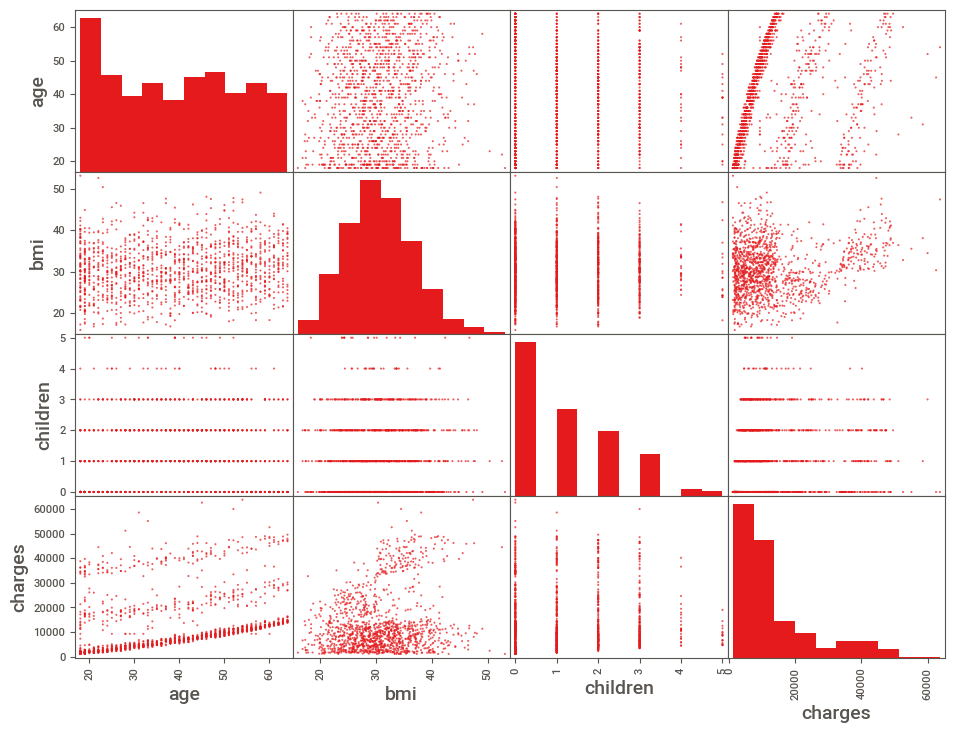

In [106]:
from pandas.plotting import scatter_matrix

# Select the columns of interest
selected_columns = ['age', 'bmi', 'children', 'charges']
subset_data = insurance_data[selected_columns]

# Use the scatter_matrix function to visualize pairwise relationships
scatter_matrix(subset_data, figsize=(10, 8), diagonal='hist', alpha=0.7)
plt.show()


1. Diagonal Plots (Histograms):

  The diagonal of the scatter matrix shows histograms for each of the selected columns. It helps us understand the distribution of each individual variable. For example, the "age" column appears to have a relatively uniform distribution, while the "charges" column is right-skewed.

2. Scatter Plots:

  The off-diagonal plots are scatter plots showing the relationships between pairs of variables. For instance, the scatter plot of "age" vs. "charges" shows that as the age increases, the charges tend to increase. This indicates a positive correlation between age and charges.

3. Interactions with Children:

  The scatter plots involving the "children" column show points clustered around specific values. This suggests that the "children" column may be categorical, and the number of children can have an impact on other variables.

Overall, the scatter matrix provides a visual representation of relationships between the selected columns. It's important to focus on diagonal histograms to understand the distribution of individual variables and off-diagonal scatter plots to identify potential correlations or patterns. In this case, it appears that "age" and "charges" may be positively correlated, while the relationship with the "children" variable is more complex and may require further investigation, considering the clustering of points.

### Experiment with Attribute Combinations

Feature engineering involves creating new features by transforming, combining, or deriving information from existing features in order to improve the performance of a machine learning model. This process aims to enhance the predictive power or capture specific patterns or relationships that may not be apparent in the original features alone.

<font color='#D61E85' size='+2'>**Q10:**</font> Try to perform feature engineering for our dataset. After creating these new features, it is important to analyze their correlations with the previous features in the dataset. By employing feature engineering methods and examining correlations, we can effectively expand the feature space and potentially uncover meaningful patterns and relationships within the dataset.

**Hint:** One straightforward method is using the division operator to derive new features.

<font color='#8FCF26' size='+2'>**A10:**</font> Create some cell down below to write and run your code.

In [107]:
# Create a new feature "charges_per_age"
insurance_data['charges_per_age'] = insurance_data['charges'] / insurance_data['age']

# Calculate the correlation between the new feature and existing features
correlation_charges_per_age = insurance_data.corr()['charges_per_age']

# Display correlations
print(correlation_charges_per_age)


age               -0.108781
sex                0.063792
bmi                0.157364
children           0.035524
smoker             0.770251
charges            0.845912
charges_per_age    1.000000
Name: charges_per_age, dtype: float64


## Prepare the Data for Machine Learning Algorithms



### Handling Text and Categorical Attributes

Machine learning algorithms typically require numerical inputs. By encoding categorical variables into numerical representations, we can include them in our models and leverage their information for predictions and analysis.

<font color='#D61E85' size='+2'>**Q14:**</font> Using categorical encoding and one-hot encoding try to transform your dataset, so the model can take advantage of non-numerical attributes. The choice between these two techniques depends on the specific characteristics of the dataset. When would you prefer using one-hot encoding over categorical encoding, or vice versa?


<font color='#8FCF26' size='+2'>**A14:**</font> Create some cell down below to write and run your code.

the choice between categorical encoding and one-hot encoding depends on the nature of the categorical variable, the relationships between categories, the machine learning algorithm, and the desired trade-offs between dimensionality and model interpretability. It's essential to analyze and understand the dataset and the problem at hand to make an informed decision on which encoding technique to use.

Here are some considerations for when to prefer one encoding technique over the other:

1. **Categorical Encoding (Label Encoding):**
   - Categorical encoding assigns a unique numerical label to each category in a categorical variable. It is useful when the categorical variable has an ordinal relationship, meaning the categories have a specific order or ranking.
   - Use categorical encoding when there is a natural order or hierarchy among the categories. For example, "low," "medium," and "high" can be encoded as 0, 1, and 2, respectively.
   - It reduces the dimensionality of the data, which can be beneficial when dealing with a large number of categories.

2. **One-Hot Encoding:**
   - One-hot encoding creates binary columns for each category, where a 1 indicates the presence of the category, and 0 indicates its absence. It is suitable for nominal categorical variables, where there is no inherent order among categories.
   - Use one-hot encoding when the categorical variable does not have a meaningful order, and all categories are equally important.
   - One-hot encoding prevents the model from assuming ordinal relationships that don't exist, but it can lead to high dimensionality when dealing with many categories.

3. **Hybrid Approaches:**
   - In some cases, a hybrid approach may be preferred. For example, you can use one-hot encoding for categorical variables with many categories and categorical encoding for those with ordinal relationships.
   - Hybrid approaches can help balance the trade-off between dimensionality and preserving information.

4. **Machine Learning Algorithm Requirements:**
   - Consider the requirements of the machine learning algorithm you plan to use. Some algorithms, like decision trees and random forests, can handle both categorical and one-hot encoded variables effectively. Others, like linear regression, may require one-hot encoding to avoid making incorrect assumptions about ordinal relationships.


In [111]:
# Perform one-hot encoding for 'region' columns
# Encoding has already been used for other categorical columns
insurance_data = pd.get_dummies(insurance_data, columns=['region'])
insurance_data

,age,sex,bmi,children,smoker,charges,charges_per_age,region_northeast,region_northwest,region_southeast,region_southwest
0,19.0,0.0,27.900,0.0,1,16884.92400,888.680211,0,0,0,1
1,18.0,1.0,33.770,1.0,0,1725.55230,95.864017,0,0,1,0
2,28.0,1.0,33.000,3.0,0,4449.46200,158.909357,0,0,1,0
3,33.0,1.0,22.705,0.0,0,21984.47061,666.196079,0,1,0,0
4,32.0,1.0,28.880,0.0,0,3866.85520,120.839225,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...
1333,50.0,1.0,30.970,3.0,0,10600.54830,212.010966,0,1,0,0
1334,18.0,0.0,31.920,0.0,0,2205.98080,122.554489,1,0,0,0
1335,18.0,1.0,36.850,0.0,0,1629.83350,90.546306,0,0,1,0
1336,21.0,0.0,25.800,0.0,0,2007.94500,95.616429,0,0,0,1


### Feature Scaling and Transformation

According to book:
"There are two common ways to get all attributes to have the same scale: min-max scaling (normalization) and standardization."

<font color='#D61E85' size='+2'>**Q15:**</font> Why we need feature scaling at all? Between these two common ways which one is more robust to outlier? What happened if we don’t do this in terms of convergence of the model?

<font color='#8FCF26' size='+2'>**A15:**</font>

<font color='#D61E85' size='+2'>**Q16:**</font> Try to perform feature scaling to our dataset.

<font color='#8FCF26' size='+2'>**A16:**</font>

###	Custom Transformers


*Transformers* definition:

> Some estimators (such as a `SimpleImputer`) can also transform a dataset; these are called *transformers*. Once again, the API is simple: the transformation is performed by the `transform()` method with the dataset to transform as a parameter. It returns the transformed dataset. This transformation generally relies on the learned parameters, as is the case for a `SimpleImputer`. All transformers also have a convenience method called `fit_transform()`, which is equivalent to calling `fit()` and then `transform()` (but sometimes `fit_transform()` is optimized and runs much faster).

Although Scikit-Learn provides many useful transformers, you will need to write your own for tasks such as custom transformations, cleanup operations, or combining specific attributes. For transformations that don’t require any training, you can just write a function that takes a NumPy array as input and outputs the transformed array. Scikit-learn provides us with `FunctionTransformer` class for these scenarios. Logarithm transformer is one of them which does not need any training.  

<font color='#D61E85' size='+2'>**Q17:**</font> What is the use case of logarithm transformer? Try to implement it using `FunctionTransformer` and then use it on our dataset.

<font color='#8FCF26' size='+2'>**A17:**</font> Create some cell down below to write and run your code.

`FunctionTransformer` is very handy, but what if you would like your transformer to be trainable, learning some parameters in the `fit()` method and using them later in the `transform()` method? For this, you need to write a custom class. Scikit-Learn relies on duck typing, so this class does not have to inherit from any particular base class. All it needs is three methods: `fit()` (which must return self), `transform()`, and `fit_transform()`.

<font color='#D61E85' size='+2'>**Q18:**</font> Robust scaling is a technique that is less sensitive to outliers compared to standardization. This approach is useful when dealing with datasets that contain significant outliers. First, explain how it works and write down its formula. Then try to implement it from scratch by writing a custom class. In addition to `fit()` and `transform()` methods it should contains `inverse_transform()`: executing `scaler.inverse_transform(scaler.fit_transform(X))` should return an array very close to `X`. Then add support for feature names: set `feature_names_in_` in the `fit()` method if the input is a DataFrame. This attribute should be a NumPy array of column names. Lastly, implement the `get_feature_names_out()` method: it should have one optional `input_features=None` argument. If passed, the method should check that its length matches `n_features_in_`, and it should match `feature_names_in_` if it is defined; then `input_features` should be returned. If `input_features` is `None`, then the method should either return `feature_names_in_` if it is defined or `np.array(["x0", "x1", ...])` with length `n_features_in_` otherwise.

<font color='#8FCF26' size='+2'>**A18:**</font> Create some cell down below to write and run your code.

### Transformation Pipelines

As you can see, there are many data transformation steps that need to be executed in the right order. Scikit-learn provides the pipeline class to help with such sequence of transformations.

<font color='#D61E85' size='+2'>**Q19:**</font> Write a pipeline for all the transformations you used so far and then call it. Compare your results with previous setup in which you perform the transformations one by one.

<font color='#8FCF26' size='+2'>**A19:**</font> Create some cell down below to write and run your code.

## Select and Train a Model

### Train and Evaluate on the Training Set

<font color='#D61E85' size='+2'>**Q20:**</font> After all it’s time to work with the model. Based on the answers you gave in the beginning of this exercise, you can choose which models you can use for the task. Try to use linear regression, decision tree regressor, random forest regressor, and support vector machine resgressor as your models and train these models on training split which you already created. Remember, using the first six attributes, we want to predict the `charges` column. Using the performance measures we talked about earlier try to compare your results. Don’t bother yourself with underlying dynamics of these models, we get to that in details in future.

<font color='#8FCF26' size='+2'>**A20:**</font> Create some cell down below to write and run your code.

### Better Evaluation Using Cross-Validation

As you probably know, you don’t want to touch the test set until you are ready to launch a model you are confident about, so you need to use part of the training set for training and part of it for model validation. If you have followed the instructions so far, you must have three sets named training, validation, and test. One way to evaluate the models is using the validation set. It helps you decide which model to use. But there is even a better way!
In [this](https://www.youtube.com/watch?v=fSytzGwwBVw) short video you can learn about *k-fold cross validation* idea.

<font color='#D61E85' size='+2'>**Q21:**</font> Try to decide which model is the best using the *k-fold cross validation*.



<font color='#8FCF26' size='+2'>**A21:**</font> Create some cell down below to write and run your code.

## Hyperparameter Tuning

Let’s assume that you now have a shortlist of promising models. You now need to hyperparameter-tune them. The two main approaches to do this is grid search and randomized search.

<font color='#D61E85' size='+2'>**Q22:**</font> Using these two methods try to improve your 2 best models from the previuos part and then decide which model to use. At the end you can check your model on the test set.

<font color='#8FCF26' size='+2'>**A22:**</font> Create some cell down below to write and run your code.

## Saving the Model

It’s often a good idea to save every model you experiment with so
that you can come back easily to any model you want. To save a model you can use the `joblib` library.